In [396]:
import rosbag
import os
import sys
import glob
import subprocess
import yaml
import numpy as np
import csv
import math
import re
import pronouncing

DEBUG = True
def debug(input):
    if DEBUG:
        print(input)

AUDIO_DATA_FILE = os.getcwd() + '/../recordings/finished_audios_name_score.csv'
#ROSBAG_DATA_PATH = '/media/prg/1F3F-B8F0/rosbag/'
ROSBAG_DATA_PATH = os.getcwd() + '/../rosbag/'
PARTICIPANT_IDS = ['p03', 'p05', 'p06', 'p08', 'p09', 'p11', 'p12', 'p15', 'p16', 'p17', 'p19', 'p21', 'p22', 'p23', 'p24']

# MUST BE RUN IN PYTHON 2 ENVIRONMENT

# this command will republish compressed images from usb_cam/image_raw/compressed as decompressed images which can
# be viewed using image view (rosrun image_transport republish compressed in:=usb_cam/image_raw raw out:=cam_out/decompressed)

# rosrun image_transport republish compressed in:=usb_cam/image_raw raw out:=cam_out/decompressed

# rosrun bag_tools make_video.py /usb_cam/image_raw/compressed rosbag/p01_sam_experiment_2017-10-06-13-18-19.bag --fps 30


# Get file names of bags organized by participant and phase

GLOBAL_BAG_DICT = {}
AUDIO_DATA_FILES = []
AUDIO_DATA_SCORES = []


with open(AUDIO_DATA_FILE, 'rb') as csvfile:
    audio_data = csv.reader(csvfile)

    for row in audio_data:
        AUDIO_DATA_FILES.append(row[0])
        AUDIO_DATA_SCORES.append(float(row[1]))                

for pid in PARTICIPANT_IDS:
    practice_bags = glob.glob(ROSBAG_DATA_PATH + pid + '/*_practice_*.bag')
    experiment_bags = glob.glob(ROSBAG_DATA_PATH + pid + '/*_experiment_*.bag')
    posttest_bags = glob.glob(ROSBAG_DATA_PATH + pid + '/*_posttest_*.bag')
    GLOBAL_BAG_DICT[pid + '_practice'] = practice_bags
    GLOBAL_BAG_DICT[pid + '_experiment'] = experiment_bags
    GLOBAL_BAG_DICT[pid + '_posttest'] = posttest_bags
    debug(pid)
    debug(len(experiment_bags))
    debug(len(posttest_bags))
    debug('-----')
    
debug(GLOBAL_BAG_DICT)


p03
1
1
-----
p05
1
1
-----
p06
1
1
-----
p08
1
1
-----
p09
1
1
-----
p11
1
1
-----
p12
1
1
-----
p15
1
1
-----
p16
1
1
-----
p17
1
1
-----
p19
1
1
-----
p21
1
1
-----
p22
1
1
-----
p23
1
1
-----
p24
1
1
-----
{'p09_experiment': ['/home/prg/catkin_ws/src/unity-game-controllers/notebooks/../rosbag/p09/p09_sam_experiment_2017-10-28-17-23-46.bag'], 'p09_posttest': ['/home/prg/catkin_ws/src/unity-game-controllers/notebooks/../rosbag/p09/p09_sam_posttest_2017-10-28-17-34-49.bag'], 'p17_experiment': ['/home/prg/catkin_ws/src/unity-game-controllers/notebooks/../rosbag/p17/p17_huili_experiment_2017-11-02-02-46-42.bag'], 'p23_experiment': ['/home/prg/catkin_ws/src/unity-game-controllers/notebooks/../rosbag/p23/p23_sam_experiment_2017-11-06-17-55-16.bag'], 'p19_experiment': ['/home/prg/catkin_ws/src/unity-game-controllers/notebooks/../rosbag/p19/p19_huili_experiment_2017-11-04-13-45-59.bag'], 'p06_experiment': ['/home/prg/catkin_ws/src/unity-game-controllers/notebooks/../rosbag/p06/p06_sam_exper

In [397]:
 def summarize_bag(bag, bag_path):

        debug("SUMMARIZING BAG")
        debug(bag)


        bag_info_dict = yaml.load(subprocess.Popen(['rosbag', 'info', '--yaml', bag_path],
         stdout=subprocess.PIPE).communicate()[0])
        debug("heres a handy info dict about the bag")
        debug(bag_info_dict)

        topics = bag.get_type_and_topic_info()[1].keys()
        types = []

        for i in range(0, len(bag.get_type_and_topic_info()[1].values())):
            types.append(bag.get_type_and_topic_info()[1].values()[i][0])

        debug('------------')

        debug("total message count")
        debug(bag.get_message_count())
        debug('------------')
        for i in range(len(topics)):
            debug("topic \"" + str(topics[i]) + "\" message count")
            debug(str(bag.get_message_count(topics[i])) + " messages")
            debug("of type " + types[i])
            debug('------------')

bagpath = GLOBAL_BAG_DICT['p16' + '_posttest'][0]
bag = rosbag.Bag(bagpath)        
summarize_bag(bag, bagpath)


#for pid in PARTICIPANT_IDS:
#    summarize_bag(GLOBAL_BAG_DICT[pid + '_experiment'])

SUMMARIZING BAG
path:        /home/prg/catkin_ws/src/unity-game-controllers/notebooks/../rosbag/p16/p16_huili_posttest_2017-11-02-02-21-40.bag
version:     2.0
duration:    5:39s (339s)
start:       Nov 02 2017 02:21:42.81 (1509603702.81)
end:         Nov 02 2017 02:27:22.41 (1509604042.41)
size:        263.1 MB
messages:    10334
compression: none [346/346 chunks]
types:       jibo_msgs/JiboAction                [c7a76c86ad9c2115ce61664c08c9fb8d]
             sensor_msgs/CompressedImage         [8f7a12909da2c9d3332d540a0977563f]
             unity_game_msgs/TapGameCommand      [3e6bc7d38de4396a9396897485733d5a]
             unity_game_msgs/TapGameLog          [60195735725f8d5081ba9dd4343e9a2b]
             unity_game_msgs/TapGameRoundSummary [d6261a2f2b3d738543e314fb6f20e7e7]
topics:      /jibo                              15 msgs @  0.1 Hz : jibo_msgs/JiboAction               
             /tap_game_from_ros                 64 msgs @  0.3 Hz : unity_game_msgs/TapGameCommand     
    

In [398]:
import pronouncing
import csv
import os
import pandas as pd
import numpy as np

"""
This Module handles all aspects of student modeling and assessment
Some code remixed from
http://katbailey.github.io/post/gaussian-processes-for-dummies/
^ Great intro article for rolling your own GP
"""
# pylint: disable=import-error
import random

import math
import operator
import matplotlib.pyplot as plt
import scipy.stats

WPSM_PATH = '/../GameUtils/PronunciationUtils/data/wpsm.csv'

"""
This module serves as the official reference for the word list used in the Tap Game
"""

class Curriculum: # pylint: disable=too-few-public-methods
    """
    This class contains all static final members that correspond to the words we will teach
    """

    #BABY = 'BABY'
    #BATHTUB = 'BATHTUB'
    #BED = "BED"
    #BICYCLE = 'BICYCLE'
    BIRD = 'BIRD'
    BOAT = 'BOAT'
    BOWL = 'BOWL'
    BROOM = 'BROOM'
    BUCKET = 'BUCKET'    
    #BUS = 'BUS'
    CAR = 'CAR'
    #CASTLE = 'CASTLE'
    CAT = 'CAT'
    CHAIR = 'CHAIR'
    CLOCK = 'CLOCK'
    CLOUD = 'CLOUD'
    #COCONUT = 'COCONUT'
    COMPUTER = 'COMPUTER'
    #COUCH = 'COUCH'
    #CRIB = 'CRIB'
    #CUP = 'CUP'
    #DAD = 'DAD'
    DEER = 'DEER'
    DIG = 'DIG'
    DOG = 'DOG'
    DOLPHIN = 'DOLPHIN'
    #DOOR = 'DOOR'
    #DRESS = 'DRESS'
    #DRESSER = 'DRESSER'
    #DUCK = 'DUCK'
    #EAT = 'EAT'
    FATHER = "FATHER"
    #FISH = 'FISH'
    #FISHING = 'FISHING'
    FLOWER = 'FLOWER'    
    #FORK = 'FORK'
    FRIDGE = 'FRIDGE'
    #FROG = 'FROG'
    #GIRAFFE = 'GIRAFFE'
    GOAT = 'GOAT'
    HAT = 'HAT'
    HORSE = 'HORSE'
    IRON = 'IRON'
    #JUMPING = 'JUMPING'
    KETTLE = 'KETTLE'
    LAMP = 'LAMP'
    LION = 'LION'
    MAILBOX = 'MAILBOX'
    MIRROR = 'MIRROR'
    MONKEY = 'MONKEY'
    MOP = 'MOP'
    MOTHER = "MOTHER"
    #MOUNTAIN = 'MOUNTAIN'
    MOUSE = 'MOUSE'
    PAINTING = 'PAINTING'
    PIG = 'PIG'
    PILLOW = 'PILLOW'
    #PLANE = 'PLANE'
    #RABBIT = 'RABBIT'
    ROOSTER = 'ROOSTER'
    #RUNNING = 'RUNNING'
    SEAL = 'SEAL'
    #SEASHELL = 'SEASHELL'
    SHEEP = 'SHEEP'
    SHIRT = 'SHIRT'
    #SHOES = 'SHOES'
    #SOCKS = 'SOCKS'
    SPOON = 'SPOON'
    STOVE = 'STOVE'
    SUN = 'SUN'
    #TABLE = 'TABLE'
    #TELEVISION = 'TELEVISION'
    #TOILET = 'TOILET'
    #TOWEL = 'TOWEL'
    TRACTOR = 'TRACTOR'
    TRAIN = 'TRAIN'
    #TREES = 'TREES'
    UMBRELLA = 'UMBRELLA'
    WINDOW = 'WINDOW'

    def __init__(self):
        return


class ActionSpace(): # pylint: disable=too-few-public-methods
    """
    This class defines constants signifying the potential actions an agent can take
    """
    RING_ANSWER_CORRECT = "RING_ANSWER_CORRECT"
    LATE_RING = "LATE_RING"
    #RING_ANSWER_WRONG = "RING_ANSWER_WRONG"
    DONT_RING = "DONT_RING"

    #REACT_FRUSTRATED = "REACT_FRUSTRATED"

    def __init__(self):
        pass
    
class StudentWordModel(): # pylint: disable=invalid-name,consider-using-enumerate,too-many-instance-attributes

    """
    This class implements a Gaussian Process, intended to model student vocabulary knowledge
    It uses a kernel based on the distance between two words in ConceptNet as well as a
    phonetic distance heuristic.
    pylint's 'invalid-name' checker has been disabled to conform with the notation
    in Rasmussen and Williams
    """

    def __init__(self):

        self.DO_ACTIVE_LEARNING = True

        #fancy python one-liner to read all string attributes off of a class
        self.curriculum = [p for p in dir(Curriculum)
                           if isinstance(getattr(Curriculum, p), str)
                           and not p.startswith('__')]

        self.pronunciation_utils = PronunciationUtils()

        self.loaded_covariance_matrix = np.load(
            os.getcwd() + self.pronunciation_utils.WORD_COVARIANCE_PATH + '.npy')

        # these parameters govern the assumed Gaussian noise added to the child's recorded
        # pronunciation assessment
        self.noise_mu = 0
        self.noise_sigma = .3

        self.X_train = [] # These are persistent lists of training data!
        self.Y_train = []

        self.means = [.5] * len(self.curriculum)  # These are the most recent posteriors
        self.variances = [.3] * len(self.curriculum) # Together they form the Student Model!
        #self.fig = None # Figure for drawing
        #self.plts = None #Plots

        self.n_rows = 10 # needs to be > 1        


    def init_model(self):
        """
        sets up the GP and kernel
        """


    def get_prior(self, n_samples):
        """
        Samples form a prior distribution over the words
        See Algorithm 2.1 in Rasmussen and Williams to follow along with implementation + notation
        """

        # Test data
        # we only care about evaluating the GP at this finite collection of points
        x_test = self.curriculum

        K_ss = self.psdm_kernel(x_test, x_test) #the Kernel Matrix for the words

        # Get cholesky decomposition (square root) of the
        # covariance matrix
        L = np.linalg.cholesky(K_ss + 1e-15 * np.eye(len(x_test)))

        # Sample 3 sets of standard normals for our test points,
        # multiply them by the square root of the covariance matrix
        f_prior = np.dot(L, np.random.normal(size=(len(x_test), n_samples)))
        return f_prior

    def train_and_compute_posterior(self, new_X_train, new_Y_train):
        """
        Takes in a list of labeled X and labeled Y data points and computes a new posterior
        E.g.
        new_X_train = ['BEE', 'SNAKE', 'TIGER']  # these numbers are the word labels
        new_Y_train = [1, 1, 1] # these numbers correspond to full correct pronunciations

        See Algorithm 2.1 in Rasmussen and Williams to follow along with implementation + notation
        """

        Xtest = self.curriculum  # these numbers are just labels

        for i in range(len(new_X_train)):
            self.X_train.append(new_X_train[i])
            self.Y_train.append(new_Y_train[i])

        # compute cov of train set wrt itself + cov of all words wrt all words
#         print("COMPUTING NEW GP POSTERIOR")
#         print("XTRAIN, YTRAIN, MU, VAR")
#         print(self.X_train)
#         print(self.Y_train)
#         print(self.means)
#         print(self.variances)
        K = self.psdm_kernel(self.X_train, self.X_train)
        K_ss = self.psdm_kernel(Xtest, Xtest)

        L = np.linalg.cholesky(K + 0.00005 * np.eye(len(self.X_train)) +
                               ((self.noise_sigma ** 2) * np.eye(len(self.X_train))))

        L_y = np.linalg.solve(L, (list(map(operator.sub, self.Y_train, self.get_mean(self.X_train))))) #pythonic way to subtract two lists #pylint: disable=line-too-long
        #L_y = np.linalg.solve(L, self.Y_train) #zero mean function version
        a = np.linalg.solve(L.T, L_y)

        # Compute the mean at our test points.
        K_s = self.psdm_kernel(self.X_train, Xtest)
        mu = self.get_mean(Xtest) + np.dot(K_s.T, a).reshape(len(self.curriculum), )
        #mu = np.dot(K_s.T, a).reshape(len(self.curriculum), ) #zero mean function version
        v = np.linalg.solve(L, K_s)

        # we only want the diagonal bc we want to know
        # variance of each variable independent of any others
        variance = np.diag(K_ss - np.dot(v.T, v))
        #stdv = np.sqrt(variance)

        self.means = mu
        self.variances = variance
#         print("GP POSTERIOR IS NOW")
#         print("XTRAIN, YTRAIN, MU, VAR")
#         print(self.X_train)
#         print(self.Y_train)
#         print(self.means)
#         print(self.variances)
        return mu, variance


    def get_next_best_word(self, action):
        """
        gives an external caller the next best word to achieve some objective
        Active Learning paradigm is implemented here!
        """


        if self.DO_ACTIVE_LEARNING:
            if action == ActionSpace.RING_ANSWER_CORRECT:

                # choose lowest mean word of words that have not yet been asked about
                lowest_mean = 10.0 # any mean will be lower than initial value 
                lowest_mean_index = 0

                for i in range(0, len(self.means)):
                    if self.means[i] < lowest_mean and self.curriculum[i] not in self.X_train:
                        lowest_mean = self.means[i]
                        lowest_mean_index = i
                chosen_word = self.curriculum[lowest_mean_index]


            elif action == ActionSpace.DONT_RING:

                # choose highest var word
                highest_var = self.variances[0]
                highest_var_index = 0

                for i in range(0, len(self.variances)):
                    if self.variances[i] > highest_var:
                        highest_var = self.variances[i]
                        highest_var_index = i
                chosen_word = self.curriculum[highest_var_index]

        else:
            # randint is inclusive
            chosen_word = self.curriculum[random.randint(0, len(self.curriculum) - 1)]


        return chosen_word

    def rbf_kernel(self, input_a, input_b, length_scale):
        """
        Implements to Radial Basis Function kernel
        """

        sqdist = np.sum(input_a ** 2, 1).reshape(-1, 1) + \
                 np.sum(input_b ** 2, 1) - 2 * np.dot(input_a, input_b.T)
        return np.exp(-.5 * (1 / length_scale) * sqdist)


    def psdm_kernel(self, word_set_a, word_set_b):
        """
        Calculates word matrix covariance via a phonetic-semantic distance metric
        """
        #k = np.empty((len(word_set_a), len(word_set_b),))

        #first, validate that these are all words in our curriculum
        for elem in set().union(word_set_a, word_set_b):
            if not elem in self.curriculum:
                raise Exception(elem + ' is not a word in our curriculum')

        k = np.ones((len(word_set_a), len(word_set_b)))
        for i in range(len(word_set_a)):
            for j in range(len(word_set_b)):
                k[i][j] = self.get_word_cov(word_set_a[i], word_set_b[j])

        return k

    def get_word_cov(self, word1, word2):
        """
        Returns specific values from the global covariance matrix
        """

        index1 = self.curriculum.index(word1)
        index2 = self.curriculum.index(word2)

        #print("covariance between " + word1 + " and " + word2)
        #print(round(self.loaded_covariance_matrix[index1][index2], 3))
        return round(self.loaded_covariance_matrix[index1][index2], 3)

    def get_mean(self, X):
        """
        Implements a mean function for the Gaussian Process. Returns a list of means
        Given a list of words
        """

        #handles both vectors and scalars
        if len(X) > 0:
            return [0.5] * len(X)
        else:
            return 0.5

    def init_plot(self):
        self.fig, self.plts = plt.subplots(self.n_rows, math.ceil(len(self.curriculum)/self.n_rows),
                                           figsize=(15, 10))


    def plot_curricular_distro(self):
        """
        Plots the most recent distribution
        """

        left = 0.125  # the left side of the subplots of the figure
        right = 0.9  # the right side of the subplots of the figure
        bottom = 0.4  # the bottom of the subplots of the figure
        top = 0.9  # the top of the subplots of the figure
        wspace = 1.0  # the amount of width reserved for blank space between subplots
        hspace = 0.2  # the amount of height reserved for white space between subplots

        for i in range(len(self.curriculum)):
            row_index = int(i / (len(self.curriculum) / self.n_rows))
            col_index = int(i % (len(self.curriculum) / self.n_rows))
            self.plts[row_index][col_index].set_xlim([-.5, 1.5])
            self.plts[row_index][col_index].set_ylim([0, 3])

            x = np.linspace(-3, 3, 50)
            self.clear_old_plot_lines()
            self.plts[row_index][col_index].plot(x, scipy.stats.norm.pdf(x, self.means[i],
                                                                         self.variances[i]),
                                                 color='b')
            self.plts[row_index][col_index].set_title(
                self.curriculum[i] + ":\n u= " + str(round(self.means[i], 2)) + ", var= " + str(
                    round(self.variances[i], 2)))

        plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
        self.fig.tight_layout()

        plt.show(block=False)
        self.fig.canvas.flush_events()
        plt.draw()

    def clear_old_plot_lines(self):
        """
        clears the previous lines that were drawn on the graph
        """
        for plotRow in self.plts:
            for plot in plotRow:
                if len(plot.lines) > 1:
                    del plot.lines[0]



class StudentPhonemeModel(): # pylint: disable=invalid-name,consider-using-enumerate,too-many-instance-attributes

    """
    This class implements a Gaussian Process, intended to model student vocabulary knowledge
    It uses a kernel based on a phonetic distance heuristic.
    pylint's 'invalid-name' checker has been disabled to conform with the notation
    in Rasmussen and Williams
    """

    def __init__(self):

        self.DO_ACTIVE_LEARNING = True

        # load all phonemes into a list
        
        df = pd.read_csv(os.getcwd() + WPSM_PATH, sep=',', header=0, index_col=0)
        arpabet_phonemes = df.keys()
        self.curriculum = list(arpabet_phonemes) # for phoneme model, this is the list of arpabet phonemes
        self.word_list = [p for p in dir(Curriculum)
                           if isinstance(getattr(Curriculum, p), str)
                           and not p.startswith('__')] #this is the list of words, used for active learning selection

        self.pronunciation_utils = PronunciationUtils()

        self.loaded_covariance_matrix = np.load(
            os.getcwd() + self.pronunciation_utils.ARPABET_COVARIANCE_PATH + '.npy')

        # these parameters govern the assumed Gaussian noise added to the child's recorded
        # pronunciation assessment
        self.noise_mu = 0
        self.noise_sigma = .3

        self.X_train = [] # These are persistent lists of training data!
        self.Y_train = []
        self.words_so_far = [] # In order to do the active learning properly, we need to maintain a list of what words
                               # have been asked already

        self.means = [.5] * len(self.curriculum)  # These are the most recent posteriors
        self.variances = [.3] * len(self.curriculum) # Together they form the Student Model!
        #self.fig = None # Figure for drawing
        #self.plts = None #Plots

        self.n_rows = 5 # needs to be > 1        


    def init_model(self):
        """
        sets up the GP and kernel
        """


    def get_prior(self, n_samples):
        """
        Samples form a prior distribution over the words
        See Algorithm 2.1 in Rasmussen and Williams to follow along with implementation + notation
        """

        # Test data
        # we only care about evaluating the GP at this finite collection of points
        x_test = self.curriculum

        K_ss = self.phoneme_distance_kernel(x_test, x_test) #the Kernel Matrix for the words

        # Get cholesky decomposition (square root) of the
        # covariance matrix
        L = np.linalg.cholesky(K_ss + 1e-15 * np.eye(len(x_test)))

        # Sample 3 sets of standard normals for our test points,
        # multiply them by the square root of the covariance matrix
        f_prior = np.dot(L, np.random.normal(size=(len(x_test), n_samples)))
        return f_prior

    def train_and_compute_posterior(self, new_X_train, new_Y_train):
        """
        Takes in a list of labeled X and labeled Y data points and computes a new posterior
        E.g.
        new_X_train = ['K', 'AE', 'T']  # these numbers are the phoneme labels
        new_Y_train = [1, 1, 1] # these numbers correspond to phoneme scores

        See Algorithm 2.1 in Rasmussen and Williams to follow along with implementation + notation
        """

        Xtest = self.curriculum  # these numbers are just labels

        for i in range(len(new_X_train)):
            self.X_train.append(new_X_train[i])
            self.Y_train.append(new_Y_train[i])

        # compute cov of train set wrt itself + cov of all words wrt all words
#         print("COMPUTING NEW GP POSTERIOR")
#         print("XTRAIN, YTRAIN, MU, VAR")
#         print(self.X_train)
#         print(self.Y_train)
#         print(self.means)
#         print(self.variances)
        K = self.phoneme_distance_kernel(self.X_train, self.X_train)
        K_ss = self.phoneme_distance_kernel(Xtest, Xtest)

        cholesky_mtx = (K + 0.00005 * np.eye(len(self.X_train)) +
                               ((self.noise_sigma ** 2) * np.eye(len(self.X_train))))
        #print(cholesky_mtx)
        # cholesky_mtx[cholesky_mtx > 1.0] = 1.0
        # print(cholesky_mtx)
        L = np.linalg.cholesky(cholesky_mtx)

        L_y = np.linalg.solve(L, (list(map(operator.sub, self.Y_train, self.get_mean(self.X_train))))) #pythonic way to subtract two lists #pylint: disable=line-too-long
        #L_y = np.linalg.solve(L, self.Y_train) #zero mean function version
        a = np.linalg.solve(L.T, L_y)

        # Compute the mean at our test points.
        K_s = self.phoneme_distance_kernel(self.X_train, Xtest)
        mu = self.get_mean(Xtest) + np.dot(K_s.T, a).reshape(len(self.curriculum), )
        #mu = np.dot(K_s.T, a).reshape(len(self.curriculum), ) #zero mean function version
        v = np.linalg.solve(L, K_s)

        # we only want the diagonal bc we want to know
        # variance of each variable independent of any others
        variance = np.diag(K_ss - np.dot(v.T, v))
        #stdv = np.sqrt(variance)

        self.means = mu
        self.variances = variance

#         print("GP POSTERIOR IS NOW")
#         print("XTRAIN, YTRAIN, MU, VAR")        

#         print(self.X_train)
#         print(self.Y_train)
#         print(self.means)
#         print(self.variances)
        return self.means, self.variances


    def get_next_best_word(self, action):
        """
        gives an external caller the next best word to achieve some objective
        Active Learning paradigm is implemented here!
        """


        if self.DO_ACTIVE_LEARNING:

            print("WORDS SO FAR IS")
            print(self.words_so_far)

            if action == ActionSpace.RING_ANSWER_CORRECT:

                # choose lowest mean word of words that have not yet been asked about
                lowest_mean = 10.0 # any mean will be lower than initial value
                lowest_mean_index = 0


                for i in range(0, len(self.word_list)):
                    candidate_mean = self.get_phoneme_mean(self.word_list[i])
                    if candidate_mean < lowest_mean and self.word_list[i] not in self.words_so_far:
                        lowest_mean = candidate_mean
                        lowest_mean_index = i
                chosen_word = self.word_list[lowest_mean_index]
                print("CHOSEN WORD WAS")
                print(chosen_word)
                print("W MEAN OF " + str(lowest_mean))


            elif action == ActionSpace.DONT_RING:

                # choose highest var word
                highest_var = -10
                highest_var_index = 0

                for i in range(0, len(self.word_list)):
                    candidate_var = self.get_phoneme_var(self.word_list[i])
                    if candidate_var > highest_var and self.word_list[i] not in self.words_so_far:
                        highest_var = candidate_var
                        highest_var_index = i
                chosen_word = self.word_list[highest_var_index]
                print("CHOSEN WORD WAS")
                print(chosen_word)
                print("W VAR OF " + str(highest_var))

        else:
            # randint is inclusive
            chosen_word = self.curriculum[random.randint(0, len(self.curriculum) - 1)]


        return chosen_word

    def rbf_kernel(self, input_a, input_b, length_scale):
        """
        Implements to Radial Basis Function kernel
        """

        sqdist = np.sum(input_a ** 2, 1).reshape(-1, 1) + \
                 np.sum(input_b ** 2, 1) - 2 * np.dot(input_a, input_b.T)
        return np.exp(-.5 * (1 / length_scale) * sqdist)


    def phoneme_distance_kernel(self, phoneme_set_a, phoneme_set_b):
        """
        Calculates word matrix covariance via a phonetic-ONLY distance metric
        """
        #k = np.empty((len(word_set_a), len(word_set_b),))

        #first, validate that these are all words in our curriculum
        for elem in set().union(phoneme_set_a, phoneme_set_b):
            if not elem in self.curriculum:
                raise Exception(elem + ' is not a phoneme in our curriculum')

        k = np.ones((len(phoneme_set_a), len(phoneme_set_b)))
        for i in range(len(phoneme_set_a)):
            for j in range(len(phoneme_set_b)):
                k[i][j] = self.get_phoneme_cov(phoneme_set_a[i], phoneme_set_b[j])

        return k

    def get_phoneme_cov(self, phoneme1, phoneme2):
        """
        Returns specific values from the phoneme covariance matrix
        """

        index1 = self.curriculum.index(phoneme1)
        index2 = self.curriculum.index(phoneme2)

        #print("covariance between " + phoneme1 + " and " + phoneme2)
        #print(round(self.loaded_covariance_matrix[index1][index2], 3))
        return round(self.loaded_covariance_matrix[index1][index2], 3)

    def get_mean(self, X):
        """
        Implements a mean function for the Gaussian Process. Returns a list of means
        Given a list of words
        """

        #handles both vectors and scalars
        if len(X) > 0:
            return [0.5] * len(X)
        else:
            return 0.5

    def get_phoneme_mean(self, word):
        """
        gets the phoneme-based mean of a word, given the current model
        """
        phonemes_raw = pronouncing.phones_for_word(word.lower())[0].split(' ')
        phonemes = [''.join(filter(lambda c: not c.isdigit(), pho)) for pho in phonemes_raw]
        
        phoneme_means = []
        for i in range(0, len(phonemes)):
            for j in range(0, len(self.curriculum)):
                if phonemes[i] == self.curriculum[j]:
                    phoneme_means.append(self.means[j])        
        return np.mean(phoneme_means)


    def get_phoneme_var(self, word):
        """
        gets the phoneme-based variance of a word, given the current model
        """
        phonemes_raw = pronouncing.phones_for_word(word.lower())[0].split(' ')
        phonemes = [''.join(filter(lambda c: not c.isdigit(), pho)) for pho in phonemes_raw]
        
        phoneme_vars = []
        for i in range(0, len(phonemes)):
            for j in range(0, len(self.curriculum)):
                if phonemes[i] == self.curriculum[j]:
                    phoneme_vars.append(self.variances[j])        
        return np.mean(phoneme_vars)

    def init_plot(self):
        self.fig, self.plts = plt.subplots(self.n_rows, math.ceil(len(self.curriculum)/self.n_rows),
                                           figsize=(15, 10))

    def plot_curricular_distro(self):
        """
        Plots the most recent distribution
        """

        left = 0.125  # the left side of the subplots of the figure
        right = 0.9  # the right side of the subplots of the figure
        bottom = 0.4  # the bottom of the subplots of the figure
        top = 0.9  # the top of the subplots of the figure
        wspace = 1.0  # the amount of width reserved for blank space between subplots
        hspace = 0.2  # the amount of height reserved for white space between subplots

        for i in range(len(self.curriculum)):
            row_index = int(i / (len(self.curriculum) / self.n_rows))
            col_index = int(i % (len(self.curriculum) / self.n_rows))
            self.plts[row_index][col_index].set_xlim([-.5, 1.5])
            self.plts[row_index][col_index].set_ylim([0, 3])

            x = np.linspace(-3, 3, 50)
            self.clear_old_plot_lines()
            self.plts[row_index][col_index].plot(x, scipy.stats.norm.pdf(x, self.means[i],
                                                                         self.variances[i]),
                                                 color='b')
            self.plts[row_index][col_index].set_title(
                self.curriculum[i] + ":\n u= " + str(round(self.means[i], 2)) + ", var= " + str(
                    round(self.variances[i], 2)))

        plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
        self.fig.tight_layout()

        plt.show(block=False)
        self.fig.canvas.flush_events()
        plt.draw()

    def clear_old_plot_lines(self):
        """
        clears the previous lines that were drawn on the graph
        """
        for plotRow in self.plts:
            for plot in plotRow:
                if len(plot.lines) > 1:
                    del plot.lines[0]


class PronunciationUtils:
	"""
	This class contains functions that handles pronunciation results obtained from SpeechACE
	"""

	SCORE_THRESHOLD = 70  # Score threshold we use to determine whether a word was passed or not
	# by SpeechAce

	PHONEME_SUB_COST_PATH = '/../GameUtils/PronunciationUtils/data/phoneme_subsitution_costs'
	WEIGHTED_LEV_DISTANCE_PATH = '/../GameUtils/PronunciationUtils/data/weighted_lev_distances'
	GLOVE_DISTANCE_PATH = '/../GameUtils/PronunciationUtils/data/glove_distances'
	ARPABET_COVARIANCE_PATH = '/../GameUtils/PronunciationUtils/data/arpabet_covariance_matrix'
	WORD_COVARIANCE_PATH = '/../GameUtils/PronunciationUtils/data/covariance_matrix'

	def __init__(self):

		# loads arpabet mapping, an IPA-like representation of phonemes for computer processing
		self.load_arpabet_mapping()

		# load nettalk.data dictionary, which is used to alignment word graphemes and phonemes
		self.load_nettalk_dataset()

		self.current_word = None
		self.pho_results = None
		self.syl_results = None

	def process_speechace_word_results(self, word_results):
		"""
		takes in results from speechace and analyze the user's pronunciation accuracy
		"""

		if word_results is None:
			return [[''], ['0']]
		else:
			self.current_word = word_results["word"]  # .encode("ascii","ignore")
			self.pho_results = word_results["phone_score_list"]
			self.syl_results = word_results["syllable_score_list"]

			phoneme_acc = self.phoneme_based_accuracy(self.pho_results)
			#syllable_acc = self.syllable_based_accuracy(self.syl_results)

		return self.get_letters_and_pass(phoneme_acc) # pass syllable_acc to analyze syllables

	def phoneme_based_accuracy(self, phoneme_results):
		"""
		checks which graphemes pass the accuracy threshold
		return: a tuple that contains three lists (graphemes, phonemes, and
		bool values indicating whether the graphemes pass threshold)
		"""
		
		graphemes, phonemes = self.phonemes2graphemes(self.current_word)
		pass_list = []
		score_list = []

		for i in range(len(phonemes)):
			score = phoneme_results[i]["quality_score"]
			if score >= PronunciationUtils.SCORE_THRESHOLD:
				pass_list.append("1")
			else:
				pass_list.append("0")
			score_list.append(score)

		return (graphemes, phonemes, pass_list, score_list)

	# def syllable_based_accuracy(self, syllable_results):
	#     """
	#     check which syllables pass the accuracy threshold
	#     return: a tuple that contains two lists (syllables and bool values)
	#     """
	#
	#     syllable_list = []
	#     pass_list = []
	#
	#     for i in range(len(syllable_results)):
	#         syllable_list.append(syllable_results[i]["letters"])
	#         score = syllable_results[i]["quality_score"]
	#         if score >= SCORE_THRESHOLD:
	#             pass_list.append(True)
	#         else:
	#             pass_list.append(False)
	#
	#     return (syllable_list, pass_list)


	def get_letters_and_pass(self, phoneme_acc):
		"""
		Associates phoneme scores with graphemes and whether they passed
		Also sends the speechace scores (indexed by phoneme) back for analysis
		"""

		graphemes, phonemes, passes, phoneme_scores = phoneme_acc
		letters = []
		passed = []

		for i in range(len(graphemes)):
			if len(graphemes[i]) > 1:  # some graphemes have multiple letters, like 'CH'
				for j in graphemes[i]:
					letters.append(j)
					passed.append(passes[i])
					
			else:
				letters.append(graphemes[i])
				passed.append(passes[i])				

		return letters, passed, phoneme_scores


	def load_arpabet_mapping(self):
		"""
		Loads the arpabet mapping, which lists all the phonemes under consideration
		"""

		# dictionary to store arpabet mapping
		self.arpabet_map = dict()
		with open('../GameUtils/PronunciationUtils/data/arpabet_mapping.csv', 'r') as csvfile:
			spamreader = csv.reader(csvfile, delimiter=',')
			for row in spamreader:
				# row[1] is CMU arpabet, row[0] is modified version of arpabet for NETTalk database
				self.arpabet_map.update({row[1]: row[0]})

	def load_nettalk_dataset(self):
		"""
		nettalk contains phonetic transcription of 20,008 english words
		dataset can be accessed at:
https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/nettalk/
		"""

		self.nettalk_dataset = dict()
		with open('../GameUtils/PronunciationUtils/data/nettalk.data', 'r') as csvfile:
			spamreader = csv.reader(csvfile, delimiter='\t')
			for row in spamreader:
				# row[0]: word. row[1]: phonetic transcription
				self.nettalk_dataset.update({row[0]: row[1]})

	def phonemes2graphemes(self, word):
		"""
		align a given word's graphemes with its phonemes using Nettalk
		"""

		#print(word)
		#print(pronouncing.phones_for_word(word.lower()))

		# need to use lowercase form of word for pronouncing and nettalk dict lookup
		phonemes_raw = pronouncing.phones_for_word(word.lower())[0].split(' ')
		phonemes = [''.join(filter(lambda c: not c.isdigit(), pho)) for pho in phonemes_raw]

		# find the phoneme-grapheme alignment in Nettalk database
		# get exact alignment
		phos = self.nettalk_dataset[word.lower()]

		print(phos)

		phos = list(phos)
		graphemes = list()
		grapheme = ''
		for i in range(0, len(phos), 1):
			if phos[i] != '-':
				# one phoneme is matched to one letter
				if grapheme != '':
					graphemes.append(grapheme)
				grapheme = word[i]
			else:
				# one phoneme is matched to an additional letter
				grapheme += word[i]
		graphemes.append(grapheme)

		# TODO: This is hack-ey and should not be done. Let this comment stand as a reminder
		# TODO: that sometimes phonemes and graphemes dont line up right...

		# For some reason camera doesn't line up phonemes and graphemes correctly
		# if word == "camera":
		#	graphemes = ['c', 'a', 'm', 'er', 'a']

		#print([graphemes, phonemes])
		return [graphemes, phonemes]

	def get_phonetic_similarity_rep(self, word):
		"""
		convert a given word into a unique phonetic transcription,
		which allows for measuring phonetic similarity with other words
		output: a phonetic string for the input word. each letter in the string
		corresponds uniquely to a phone
		"""

		phonemes_raw = pronouncing.phones_for_word(word.lower())[0].split(' ')
		phonemes = [''.join(filter(lambda c: not c.isdigit(), pho)) for pho in phonemes_raw]
		#print(phonemes_raw)
		output = ''
		for phoneme in phonemes:
			if phoneme in self.arpabet_map:
				output += self.arpabet_map[phoneme]
			else:
				print("phone ( " + phoneme + " ) does not exist in arpabet map")
				break
		
		#print(word + " become " + output)
		return output



In [399]:
## This module will rectify bags!

## That means, combining pids with experiments spread across multiple bags

## It also means looking at messages with all-zero scores (indicative of bad speechace results) and
## re-running them through SpeechAce to get a new score, and retraining the GP's after that


import time 
import json

myUtils = PronunciationUtils()

def speechace(audio_file, expected_text):
    """
    Takes the audiofile and uses the text it is supposed to match; returns a
    score and the time elapsed to calculate the score.
    """
    start_time = time.time()

    # send request to speechace api
    api_command = "curl --form text='" + expected_text + "' --form user_audio_file=@" + audio_file + " --form dialect=general_american --form user_id=1234 \"https://api.speechace.co/api/scoring/text/v0.1/json?key=po%2Fc4gm%2Bp4KIrcoofC5QoiFHR2BTrgfUdkozmpzHFuP%2BEuoCI1sSoDFoYOCtaxj8N6Y%2BXxYpVqtvj1EeYqmXYSp%2BfgNfgoSr5urt6%2FPQzAQwieDDzlqZhWO2qFqYKslE&user_id=002\"" # pylint: disable=line-too-long
#     process = subprocess.Popen(api_command, shell=True, stdout=subprocess.PIPE,
#                                stderr=subprocess.STDOUT)  
#     process.wait()
#     pouts = process.stdout.readlines()

    pouts = subprocess.check_output(api_command, shell=True)
    
    #print("RESULT")
    #print(pouts)

    elapsed_time = time.time() - start_time
    print("took " + str(elapsed_time) + " seconds to get speechAce results")

    # decode json outputs from speechace api
    #json.loads(pouts)
    try:
        #print('json loads')
        #print(type(pouts))
        #print(json.loads(pouts))
        result = json.loads(pouts)['text_score']        
        result_text = result['text']
        result_qualityScore = result['quality_score']
        result_word_score_list = result['word_score_list']

        return result_word_score_list
    except: #pylint: disable= bare-except
        try:
            print("TRYING BACKUP METHOD OF PARSING")            
            result = json.loads(pouts)
            #print(json_2)
            # split on 300k, combine parts 3 and 4
        except:
            print("EVEN OUR BACKUP PARSE DID NOT GET VALID RESPONSE")
            return
        
def rectify_speechace_bag(exp_bag, bag_pid):
    """
    corrects invalid SpeechAce results (manifested as all-zero scores) in bags
    """
    
    summary_msgs = []
    final_bag_msgs = [] #indexed by round, these are the rectified messages
    # read all messages
    for topic, msg, time in exp_bag.read_messages():            
            # get all experimental rounds that the human won
            if topic == '/tap_game_round_summary' and not msg.audio_file == 'None':
                summary_msgs.append(msg)

    print("FOUND " + str(len(summary_msgs)) + " SUMMARY MESSAGES BEFORE RECTIFYING")
    #iterate through scores in messages to find the zero messages
    
    for msg in summary_msgs:
        #print("AT START OF RECTIFICATION WORD MEANS LENGTH: " + str(len(msg.word_means)))
        
        nonzero_score_found = False #flag
        
        avg_phone_score = (sum(msg.scores) / len(msg.scores))
        for score in msg.scores:
            if not score == 0.0:
                nonzero_score_found = True
        
        if not nonzero_score_found:
            print(str(msg.round_index) + ": AVG PHONE SCORE RECTIFYING SPEECHACE WAS " + str(avg_phone_score))
            audio_file = msg.audio_file.split('/')[-1]
            
            #re-assign audio pids for p21 bag
            if bag_pid == 'p21':
                audio_file = audio_file.replace('p04', 'p21')
                msg.audio_file = msg.audio_file.replace('p04', 'p21')
                audio_file = audio_file.replace('p00', 'p21')
                msg.audio_file = msg.audio_file.replace('p00', 'p21')
                print("Re-Assigning p21 in exp_bag")
                print(audio_file)
                print(msg.audio_file)
                
            
            pid = audio_file.split('_')[0]
            word = audio_file.split('_')[3]
            word_score_list = speechace('../recordings/' + str(pid) + '/' + audio_file, word)

            if word_score_list:
                for word_results in word_score_list:
                    letters, passed, scores = \
                        myUtils.process_speechace_word_results(word_results)
                    
                    msg.letters = [letter.encode('ascii', 'ignore') for letter in letters]
                    avg_phone_score = (sum(scores) / len(scores))
                    print(str(msg.round_index) + ": NEW PHONE SCORE RECTIFYING SPEECHACE IS " + str(avg_phone_score))
                    msg.scores = scores
                    msg.passed = passed
            else:
                print("STILL BAD OUTPUT FROM SPEECHACE")
        #print("At end OF RECTIFICATION WORD MEANS LENGTH: " + str(len(msg.word_means)))
        final_bag_msgs.append(msg)
            
    return final_bag_msgs

def rectify_gp(rectified_msgs):
    """
    retrains the word and phoneme GP's from scratch, using the new rectified msgs
    """
    
    final_bag_msgs = []
    student_word_model = StudentWordModel()
    student_phoneme_model = StudentPhonemeModel()
    #print("ORIG CURRICULUM FOR BAG IS")
    #print(rectified_msgs[0].word_curriculum)
    #print(len(rectified_msgs[0].word_curriculum))
    
    student_word_model.curriculum = rectified_msgs[0].word_curriculum

    #print("CURRENT CURRICULUM FOR BAG IS")
    #print(student_word_model.curriculum)
    #print(len(student_word_model.curriculum))
    
    for msg in rectified_msgs:        
        
        #print("AT START OF GP RECTIFICATION WORD MEANS LENGTH: " + str(len(msg.word_means)))

        avg_phone_score = (sum(msg.scores) / len(msg.scores))
        #print(str(msg.round_index) + ": AVG PHONE SCORE  RECTIFYING GP " + str(avg_phone_score))
        word_means, word_variances = student_word_model.train_and_compute_posterior([msg.current_round_word],
                                                                                 [avg_phone_score / 100.0])

        phonemes_raw = pronouncing.phones_for_word(msg.current_round_word.lower())[0].split(' ')
        arpabet_phonemes = [''.join(filter(lambda c: not c.isdigit(), pho)) for pho in phonemes_raw]
        #print("ARPABET PHONEME FOR ROUND")
        #print(arpabet_phonemes)
        #print(msg.scores)

        #student_phoneme_model.words_so_far.append(msg.current_round_word) #tell the phoneme model which word for active learning

        phoneme_means, phoneme_vars = student_phoneme_model.train_and_compute_posterior(arpabet_phonemes, [x / 100.0 for x in msg.scores])
        
#         for i in range(0, len(word_means)):
#             print(word_means[i] - msg.word_means[i])
#         print('-----------------')

        msg.word_means = word_means
        msg.word_variances = word_variances

        msg.phoneme_means = phoneme_means
        msg.phoneme_variances = phoneme_vars
        #print("AT END OF GP RECTIFICATION WORD MEANS LENGTH: " + str(len(msg.word_means)))

        final_bag_msgs.append(msg)            
    return final_bag_msgs
        
#         print((list(map(operator.sub, rectified_msgs[-1].word_means, new_gp_msgs[-1].word_means))))
#         print('-----------')
#         print((list(map(operator.sub, rectified_msgs[-1].word_variances, new_gp_msgs[-1].word_variances))))
#         print('-----------')
        
#         print((list(map(operator.sub, rectified_msgs[-1].phoneme_means, new_gp_msgs[-1].phoneme_means))))
#         print('-----------')
#         print((list(map(operator.sub, rectified_msgs[-1].phoneme_variances, new_gp_msgs[-1].phoneme_variances))))
#         print('-----------')
#         print('-----------')
#         print('-----------')
#         print('-----------')
        
#         print((list(map(operator.sub, og_summary_msgs[-1].word_means, new_gp_msgs[-1].word_means))))
#         print('-----------')
#         print((list(map(operator.sub, og_summary_msgs[-1].word_variances, new_gp_msgs[-1].word_variances))))
#         print('-----------')
#         print((list(map(operator.sub, og_summary_msgs[-1].phoneme_means, new_gp_msgs[-1].phoneme_means))))
#         print('-----------')
#         print((list(map(operator.sub, og_summary_msgs[-1].phoneme_variances, new_gp_msgs[-1].phoneme_variances))))
#         print('-----------')
#         print('-----------')
#         print('-----------')
#         print('-----------')
#         print('-----------')
                
        #for i in range(0, len(rectified_msgs[-1].word_variances)):
        #    gp_word_mean_deltas.append(rectified_msgs[-1].word_means[i] - new_gp_msgs[-1].word_means[i])
        #print(gp_word_mean_deltas)

    #post_bag = rosbag.Bag(post_bagpath)
    
                

In [451]:
def phoneme_score_from_word(final_msg, word):
    """
    gets the phoneme-based mean of a word, given the current model
    """
    phonemes_raw = pronouncing.phones_for_word(word.lower())[0].split(' ')
    phonemes = [''.join(filter(lambda c: not c.isdigit(), pho)) for pho in phonemes_raw]

    phoneme_means = []
    for i in range(0, len(phonemes)):
        for j in range(0, len(final_msg.phoneme_curriculum)):
            if phonemes[i] == final_msg.phoneme_curriculum[j]:
                phoneme_means.append(final_msg.phoneme_means[j])        
    #debug('PHONEME MEANS FOR ' + word)
    #debug(phoneme_means)
    return np.mean(phoneme_means)

def analyze_round_summaries(exp_final_message, post_bag, post_bag_pid):
                        
        post_summary_msgs = []
        post_audios = []
     
        # collect ALL recordings from the posttest (to be cross-refd with results)
        for topic, msg, time in post_bag.read_messages():
            
            if topic == '/tap_game_round_summary' and not msg.audio_file == 'None':
                # regex to match for pid and word in ground truth results
                match_string = pid + '.*posttest.*' + msg.current_round_word + '.*wav'
                r = re.compile(match_string)

                #Ground truth audio matches in our results file
                gt_audio_matches = filter(r.match, AUDIO_DATA_FILES)

                # make sure we only add the summary and audio messages
                if not len(gt_audio_matches) == 1:
                    print(match_string)
                    print(gt_audio_matches)
                    print("IRREGULARITY DETECTED IN RESULTS ?!?!?")
                
                else:
                    
                    if post_bag_pid == 'p21':                        
                        msg.audio_file = msg.audio_file.replace('p00', 'p21')
                        print("Re-Assigning p21 in post")
                        print(msg.audio_file)
                    post_summary_msgs.append(msg)
                    post_audios.append(msg.audio_file)
            #else:
            #    print('not a summary message')
                
        debug("FOUND " + str(len(post_summary_msgs)) + " MSGS in POSTTEST")
                
        word_scores, phoneme_scores, ground_truth_ratings, speechace_scores = get_all_scores_and_ratings(post_summary_msgs, exp_final_msg)      
        return word_scores, phoneme_scores, ground_truth_ratings, speechace_scores
        
def get_all_scores_and_ratings(post_msgs, final_msg):
    
    word_scores = []
    phoneme_scores = []
    ground_truth_ratings = []
    speechace_scores = []
    
    for post_msg in post_msgs:
        audio_data_candidate = post_msg.audio_file.split('/')[-1]
        pid = audio_data_candidate.split('_')[0]
        word = audio_data_candidate.split('_')[3]
        
        word_index = final_msg.word_curriculum.index(word)
        if (word_index == -1):
            print("WORD INDEX WAS -1. WTF!")
        
        word_scores.append(final_msg.word_means[word_index])
        phoneme_scores.append(phoneme_score_from_word(final_msg, word))
        
        # regex to match for pid and word in ground truth results
        r = re.compile(pid + '.*posttest.*' + word + '.*wav')
              
        #Ground truth audio matches in our results file
        gt_audio_matches = filter(r.match, AUDIO_DATA_FILES)
        if not len(gt_audio_matches) == 1:
            print(gt_audio_matches)
            print("AUDIO FILE HAD NO MATCH IN RESULTS")
            #print(AUDIO_DATA_FILES)
            return 0,0,0,0,0,0,0,0

        if gt_audio_matches[0] in AUDIO_DATA_FILES:
            gt_match = gt_audio_matches[0]            
            gt_index = AUDIO_DATA_FILES.index(gt_match)                        
            ground_truth_ratings.append(AUDIO_DATA_SCORES[gt_index])
            
            pid = gt_match.split('_')[0]
            word = gt_match.split('_')[3]
            
            #UNCOMMENT TO GET SPEECHACE SCORES FROM SCRATCH
#             word_score_list = speechace('../recordings/' + str(pid) + '/' + gt_match, word)
#             if word_score_list:
#                 for word_results in word_score_list:
#                     letters, passed, scores = \
#                         myUtils.process_speechace_word_results(word_results)
                        
#                     speechace_scores.append(scores)
        else:
            print("NO GROUND TRUTH RATING IN OUR DATASET")
            
            
    if not (len(word_scores) == len(phoneme_scores)) and (len(phoneme_scores) == len(ground_truth_ratings)):
        print("MISMATCH IN SCORE LENGTHS AT CONSTRUCTION TIME!!!!")
    return word_scores, phoneme_scores, ground_truth_ratings, speechace_scores
        
        
    

def calculate_round_loss(word_scores, phoneme_scores, ground_truth_ratings):
        """
        computes several different forms of loss of speechace results compared to MTurk audio results
        """

        total_word_ceiling_loss = []
        total_word_floor_loss = []
        total_word_rounded_loss = []
        total_word_no_change_loss = []
        
        total_phoneme_ceiling_loss = []
        total_phoneme_floor_loss = []
        total_phoneme_rounded_loss = []
        total_phoneme_no_change_loss = []
        
        if not (len(word_scores) == len(phoneme_scores)) and (len(phoneme_scores) == len(ground_truth_ratings)):
            print("MISMATCH IN SCORE LENGTHS AT EVAL TIME!!!!")
        
        for i in range(0, len(ground_truth_ratings)):
              
#             binned_word_score = word_scores[i] * 100 / 20.0
#             binned_phoneme_score = phoneme_scores[i] * 100 / 20.0
#             ground_truth_rating = ground_truth_ratings[i]

            binned_word_score = 1 if word_scores[i] > 0.4 else 0
            binned_phoneme_score = 1 if phoneme_scores[i] > 0.4 else 0
            ground_truth_rating = 1 if ground_truth_ratings[i] > 3 else 0
            

            #debug("GROUND TRUTH WAS") 
            #debug(ground_truth_rating)
            #debug("POSTERIOR WORD SCORE WAS")
            #debug(binned_word_score)
            #debug("POSTERIOR PHONEME SCORE WAS")
            #debug(binned_phoneme_score)
            #debug('-------')

            # UNCOMMENT TO USE L1 LOSS
            word_no_change_loss = abs(binned_word_score - ground_truth_rating)
            word_ceiling_loss = abs(math.ceil(binned_word_score) - ground_truth_rating)
            word_floor_loss = abs(math.floor(binned_word_score) - ground_truth_rating)
            word_rounded_loss = abs(round(binned_word_score) - ground_truth_rating)
            
            phoneme_no_change_loss = abs(binned_phoneme_score - ground_truth_rating)
            phoneme_ceiling_loss = abs(math.ceil(binned_phoneme_score) - ground_truth_rating)
            phoneme_floor_loss = abs(math.floor(binned_phoneme_score) - ground_truth_rating)
            phoneme_rounded_loss = abs(round(binned_phoneme_score) - ground_truth_rating)

            # UNCOMMENT TO USE L2 LOSS
            #no_change_word_loss = (binned_word_score - ground_truth_rating)**2
            #ceiling_word_loss = (math.ceil(binned_word_score) - ground_truth_rating)**2
            #floor_word_loss = (math.floor(binned_word_score) - ground_truth_rating)**2
            #rounded_word_loss = (round(binned_word_score) - ground_truth_rating)**2

            #print(ceiling_word_loss)
            #print(floor_word_loss)
            #print(rounded_word_loss)
            
            total_word_ceiling_loss.append(word_ceiling_loss)
            total_word_floor_loss.append(word_floor_loss)
            total_word_rounded_loss.append(word_rounded_loss)
            total_word_no_change_loss.append(word_no_change_loss)
            
            total_phoneme_ceiling_loss.append(phoneme_ceiling_loss)
            total_phoneme_floor_loss.append(phoneme_floor_loss)
            total_phoneme_rounded_loss.append(phoneme_rounded_loss)
            total_phoneme_no_change_loss.append(phoneme_no_change_loss)

        return total_word_ceiling_loss, total_word_floor_loss, total_word_rounded_loss, total_word_no_change_loss, total_phoneme_ceiling_loss, total_phoneme_floor_loss, total_phoneme_rounded_loss, total_phoneme_no_change_loss



In [402]:
#### Rectify all EXPERIMENTAL bags here
speechace_rectified_msgs = []
#for pid in ['p16','p17']:
for pid in PARTICIPANT_IDS:
    print('------------')
    print("RECTIFYING PID " + str(pid))
    post_bagpaths = GLOBAL_BAG_DICT[pid + '_posttest']
    exp_bagpaths = GLOBAL_BAG_DICT[pid + '_experiment']
    
    for bagpath in exp_bagpaths:
        
        og_summary_msgs = []
        rectified_msgs = []
        new_gp_msgs = []
        # read all messages
        exp_bag = rosbag.Bag(bagpath)

        for topic, msg, timestamp in exp_bag.read_messages():            
            # get all experimental rounds that the human won
            if topic == '/tap_game_round_summary' and not msg.audio_file == 'None':
                og_summary_msgs.append(msg)
                
                
        rectified_msgs = rectify_speechace_bag(exp_bag, pid)
        print(len(rectified_msgs[-1].word_means))
        print(len(og_summary_msgs[-1].word_means))        
        speechace_rectified_msgs.append(rectified_msgs)

        


------------
RECTIFYING PID p03
FOUND 19 SUMMARY MESSAGES BEFORE RECTIFYING
1: AVG PHONE SCORE RECTIFYING SPEECHACE WAS 0.0
took 3.5852189064 seconds to get speechAce results
b-Rd
1: NEW PHONE SCORE RECTIFYING SPEECHACE IS 34.3529383501
3: AVG PHONE SCORE RECTIFYING SPEECHACE WAS 0.0
took 3.98159503937 seconds to get speechAce results
bo-l
3: NEW PHONE SCORE RECTIFYING SPEECHACE IS 65.7142199234
12: AVG PHONE SCORE RECTIFYING SPEECHACE WAS 0.0
took 3.7989180088 seconds to get speechAce results
si-l
12: NEW PHONE SCORE RECTIFYING SPEECHACE IS 14.1119369229
45
45
------------
RECTIFYING PID p05
FOUND 19 SUMMARY MESSAGES BEFORE RECTIFYING
45
45
------------
RECTIFYING PID p06
FOUND 19 SUMMARY MESSAGES BEFORE RECTIFYING
45
45
------------
RECTIFYING PID p08
FOUND 19 SUMMARY MESSAGES BEFORE RECTIFYING
10: AVG PHONE SCORE RECTIFYING SPEECHACE WAS 0.0
took 3.94965314865 seconds to get speechAce results
k@t
10: NEW PHONE SCORE RECTIFYING SPEECHACE IS 26.4660045138
13: AVG PHONE SCORE RECTIFYIN

In [403]:
import pickle
SAVE = False
LOAD = True
PIK = "rectified_exp_messages.dat"

speechace_rectified_msgs_master = []

if (SAVE):
    speechace_rectified_msgs_master = speechace_rectified_msgs
    with open(PIK, "wb") as f:
        pickle.dump(speechace_rectified_msgs_master, f)
if(LOAD):
    with open(PIK, "rb") as f:
        speechace_rectified_msgs_master = pickle.load(f)

print(len(speechace_rectified_msgs_master))
speechace_rectified_msgs = speechace_rectified_msgs_master

# for i in range(0, len(all_speechace_scores)):
#     speechace_means = [np.mean(x) / 100.0 for x in all_speechace_scores[i]]
#     print(speechace_means)



15


In [404]:
# HERE IS WHERE WE PLAY WITH GP_RECTIFICATION

all_rectified_msgs = []


for message_set in speechace_rectified_msgs:
    
    pid = message_set[0].audio_file.split('/')[-1][0:3]
    print(pid)
    
    new_gp_msgs = rectify_gp(message_set)

    #print(len(rectified_msgs[-1].word_means))
    #print(len(og_summary_msgs[-1].word_means))
    #print(len(new_gp_msgs[-1].word_means))

    all_rectified_msgs.append([pid, new_gp_msgs])

    #print((list(map(operator.sub, og_summary_msgs[-1].word_means, new_gp_msgs[-1].word_means))))
    #print((list(map(operator.sub, og_summary_msgs[-1].phoneme_means, new_gp_msgs[-1].phoneme_means))))
    
print(len(all_rectified_msgs))

p03
p05
p06
p08
p09
p11
p12
p15
p16
p17
p19
p21
p22
p23
p24
15


In [382]:
#### Rectify all POSTTEST bags here
all_rectified_post_msgs = []        
#for pid in ['p21']:
for pid in PARTICIPANT_IDS:
    print('------------')
    print("RECTIFYING PID " + str(pid))
    post_bagpaths = GLOBAL_BAG_DICT[pid + '_posttest']
    exp_bagpaths = GLOBAL_BAG_DICT[pid + '_experiment']
    
    for bagpath in post_bagpaths:
        
        og_summary_msgs = []
        rectified_post_msgs = []
        new_gp_post_msgs = []
        # read all messages
        post_bag = rosbag.Bag(bagpath)

        for topic, msg, timestamp in post_bag.read_messages():            
            # get all experimental rounds that the human won
            if topic == '/tap_game_round_summary' and not msg.audio_file == 'None':
                og_summary_msgs.append(msg)
                
                
        rectified_post_msgs = rectify_speechace_bag(post_bag, pid)
        new_gp_post_msgs = rectify_gp(rectified_post_msgs)
        all_rectified_post_msgs.append([pid, new_gp_post_msgs])
        
        print((list(map(operator.sub, og_summary_msgs[-1].word_means, new_gp_post_msgs[-1].word_means))))
        print((list(map(operator.sub, og_summary_msgs[-1].phoneme_means, new_gp_post_msgs[-1].phoneme_means))))

------------
RECTIFYING PID p03
FOUND 44 SUMMARY MESSAGES BEFORE RECTIFYING
[-4.2545411638172936e-10, 7.6590105368978811e-09, 1.8782859267929553e-08, 4.0385955690780406e-08, -2.9775448440183538e-08, -2.8208910318738845e-08, 7.1793431200006808e-09, 5.1265466316507968e-09, -3.7201810521025891e-09, -1.3307127622042003e-08, -1.2246721636799407e-08, 2.653737030122727e-08, -1.8341805740895722e-08, 2.1099836988724974e-08, 8.3707067943805669e-09, -1.2329278042955139e-08, -9.6084319389788675e-09, 4.8346887604466815e-09, -1.2943633054263159e-08, 3.880645915721459e-08, 7.4839505703749865e-09, -2.1160804664077659e-08, -1.7209939473517011e-08, -1.8234915799553164e-08, 8.7062135278870301e-11, 1.7859916212614735e-08, 2.6271549380396664e-09, -8.7966086637081276e-09, -7.8691799743069168e-09, 1.3944673415977604e-08, 3.5976832624129429e-09, -7.4673200955999164e-10, -1.0603347533333363e-08, -2.4212789995203821e-08, -1.2842639063315175e-08, -2.9898004294537373e-08, -3.5881922766378693e-08, -2.6796103669290

In [416]:
print(GLOBAL_BAG_DICT['p08_experiment'])
print(GLOBAL_BAG_DICT['p08_posttest'])
print(all_rectified_msgs[0][0])

['/home/prg/catkin_ws/src/unity-game-controllers/notebooks/../rosbag/p08/p08_sam_experiment_2017-10-28-16-55-50.bag']
['/home/prg/catkin_ws/src/unity-game-controllers/notebooks/../rosbag/p08/p08_sam_posttest_2017-10-28-17-05-42.bag']
p03


In [452]:
# This is where we actually compute the loss for each bag
all_bag_word_loss = []
all_bag_phoneme_loss = []

odd_bag_word_loss = []
odd_bag_phoneme_loss = []

even_bag_word_loss = []
even_bag_phoneme_loss = []

all_bag_word_scores = []
all_bag_phoneme_scores = []


odd_bag_word_scores = []
odd_bag_phoneme_scores = []

even_bag_word_scores = []
even_bag_phoneme_scores = []


all_bag_gt = []
odd_bag_gt = []
even_bag_gt = []

all_speechace_scores = []
even_bag_speechace_scores = []
odd_bag_speechace_scores = []


for pid_msg_pair in all_rectified_msgs:    
    print('-----------------------')
    pid = pid_msg_pair[0]
    msgs = pid_msg_pair[1]
    print("ANALYZING PID " + str(pid))

    post_bagpath = GLOBAL_BAG_DICT[pid + '_posttest'][0]        
    post_bag = rosbag.Bag(post_bagpath)
    exp_final_msg = msgs[-1]

    word_scores, phoneme_scores, ground_truth_ratings, speechace_scores = analyze_round_summaries(exp_final_msg, post_bag, pid)    
    word_ceiling_loss, word_floor_loss, word_rounded_loss, word_no_change_loss, phoneme_ceiling_loss, phoneme_floor_loss, phoneme_rounded_loss, phoneme_no_change_loss, = calculate_round_loss(word_scores, phoneme_scores, ground_truth_ratings)

    print("LENGTH OF SPEECHACE SCORES AND GT RATINGS")
    print(len(speechace_scores))
    print(len(ground_truth_ratings))    
    all_bag_word_loss.append(word_no_change_loss)
    all_bag_phoneme_loss.append(phoneme_no_change_loss)

    all_bag_word_scores.append(word_scores)
    all_bag_phoneme_scores.append(phoneme_scores)    
    all_bag_gt.append(ground_truth_ratings)
    all_speechace_scores.append(speechace_scores)

    if int(pid[1:]) % 2 == 1:
        print("USED WORD MODEL FOR ACTIVE LEARNING")
        odd_bag_word_loss.append(word_no_change_loss)
        odd_bag_phoneme_loss.append(phoneme_no_change_loss)

        odd_bag_word_scores.append(word_scores)
        odd_bag_phoneme_scores.append(phoneme_scores)
        odd_bag_gt.append(ground_truth_ratings)

        odd_bag_speechace_scores.append(speechace_scores)

    else:
        even_bag_word_loss.append(word_no_change_loss)
        even_bag_phoneme_loss.append(phoneme_no_change_loss)

        even_bag_word_scores.append(word_scores)
        even_bag_phoneme_scores.append(phoneme_scores)
        even_bag_gt.append(ground_truth_ratings)
        even_bag_speechace_scores.append(speechace_scores)


-----------------------
ANALYZING PID p03
FOUND 44 MSGS in POSTTEST
LENGTH OF SPEECHACE SCORES AND GT RATINGS
0
44
USED WORD MODEL FOR ACTIVE LEARNING
-----------------------
ANALYZING PID p05
FOUND 44 MSGS in POSTTEST
LENGTH OF SPEECHACE SCORES AND GT RATINGS
0
44
USED WORD MODEL FOR ACTIVE LEARNING
-----------------------
ANALYZING PID p06
FOUND 31 MSGS in POSTTEST
LENGTH OF SPEECHACE SCORES AND GT RATINGS
0
31
-----------------------
ANALYZING PID p08
FOUND 31 MSGS in POSTTEST
LENGTH OF SPEECHACE SCORES AND GT RATINGS
0
31
-----------------------
ANALYZING PID p09
FOUND 44 MSGS in POSTTEST
LENGTH OF SPEECHACE SCORES AND GT RATINGS
0
44
USED WORD MODEL FOR ACTIVE LEARNING
-----------------------
ANALYZING PID p11
FOUND 44 MSGS in POSTTEST
LENGTH OF SPEECHACE SCORES AND GT RATINGS
0
44
USED WORD MODEL FOR ACTIVE LEARNING
-----------------------
ANALYZING PID p12
p12.*posttest.*IRON.*wav
['p12_safinah_posttest_IRON_21.wav', 'p12_safinah_posttest_IRON_21.wav']
IRREGULARITY DETECTED IN R

In [453]:
print(a[3])

[[1.25, 89.42857142857143, 86.88888888888887], [98.66666666666667, 9.302083333333334, 90.00877192982456], [97.27272727272727, 85.65217391304348, 93.19148936170212], [99.16666666666667, 88.4375, 13.3763440860215, 87.52173913043478], [100.0, 19.375, 99.5, 55.31746031746031, 94.21428571428571], [99.27272727272727, 98.4090909090909, 98.56], [85.0, 16.801724137931036, 81.14035087719299], [35.0, 0, 26.666666666666668], [100.0, 99.61538461538461, 96.27777777777777, 64.69565217391305], [89.83333333333333, 81.44444444444444, 73.40229885057472, 73.44444444444444], [82.08333333333333, 86.71428571428571, 87.0, 9.027777777777777, 22.04444444444444, 17.5679012345679, 98.42857142857143, 4.544961240310078], [80.0, 97.14285714285714, 94.44], [77.93333333333334, 5.392543859649121, 12.141935483870968], [96.25, 75.94444444444444, 11.787500000000001], [98.53333333333333, 94.5, 88.17391304347827, 89.74074074074073, 17.875, 79.6842105263158], [41.666666666666664, 91.0, 35.0, 0], [90.1111111111111, 96.8571428

In [454]:
import pickle
SAVE = False
LOAD = True
PIK = "speechace_scores.dat"

speechace_master = []
all_bag_gt.append(ground_truth_ratings)

if (SAVE):
    speechace_master = [all_speechace_scores, even_bag_speechace_scores, odd_bag_speechace_scores]
    with open(PIK, "wb") as f:
        pickle.dump(speechace_master, f)
if(LOAD):
    with open(PIK, "rb") as f:
        speechace_master = pickle.load(f)
        all_speechace_scores = speechace_master[0]
        even_bag_speechace_scores = speechace_master[1]
        odd_bag_speechace_scores = speechace_master[2]

# all_speechace_scores[3] = a[3]
# even_bag_speechace_scores[1] = a[3]
print(len(speechace_master))
print(len(all_speechace_scores[3]))
print(len(speechace_master[1][1]))
print(len(speechace_master[2][0]))


# for i in range(0, len(all_speechace_scores)):
#     speechace_means = [np.mean(x) / 100.0 for x in all_speechace_scores[i]]
#     print(speechace_means)


3
31
31
44


In [456]:

# make some graphs!!!!
import matplotlib.pyplot as plt
from sklearn import metrics

GT_class_threshold = 2.0
SA_class_threshold = .66

######### ALL_BAG SPEECHACE TO EXP_SCORE ##############
all_speechace_auc = []
even_speechace_auc = []
odd_speechace_auc = []


######### ALL_BAG SPEECHACE AUC TO GT ##############

all_word_auc = []
all_phoneme_auc = []

odd_word_auc = []
odd_phoneme_auc = []

even_word_auc = []
even_phoneme_auc = []

pos_class_count = 0
neg_class_count = 0

for i in range(0, len(all_speechace_scores)):
    print(i)
    #print(all_speechace_scores[i])
    speechace_means = [np.mean(x) / 100.0 for x in all_speechace_scores[i]]
    bag_ground_truth = [(1 if x > GT_class_threshold else 0) for x in all_bag_gt[i]]

    for x in bag_ground_truth:
        if x == 1:
            pos_class_count += 1
        else:
            neg_class_count +=1
    
    #print(bag_ground_truth)

    if (len(all_bag_gt)) > 1:
        
        # SpeechAce to Ground Truth
        #speechace_fpr, speechace_tpr, thresholds = metrics.roc_curve(bag_ground_truth, speechace_means)
        
        #Word/Phoneme Score to AUC
        #word_fpr, word_tpr, thresholds = metrics.roc_curve(bag_ground_truth, all_bag_word_scores[i])
        #phoneme_fpr, phoneme_tpr, thresholds = metrics.roc_curve(bag_ground_truth, all_bag_phoneme_scores[i])
        
        pid = all_rectified_msgs[i][0]
        print(pid)
        #print("speechace pid was" + str(pid))
        #all_speechace_auc.append(metrics.auc(speechace_fpr, speechace_tpr))
        print("SPEECHACE ROC AND APS")
        print(metrics.roc_auc_score(bag_ground_truth, speechace_means))
        print(metrics.average_precision_score(bag_ground_truth, speechace_means))
        
            
        print("EXP ROC AND APS, WORD, PHONEME")
        print(metrics.roc_auc_score(bag_ground_truth, all_bag_word_scores[i]))
        print(metrics.average_precision_score(bag_ground_truth, all_bag_word_scores[i]))
        print(metrics.roc_auc_score(bag_ground_truth, all_bag_phoneme_scores[i]))
        print(metrics.average_precision_score(bag_ground_truth, all_bag_phoneme_scores[i]))

        all_speechace_auc.append(metrics.average_precision_score(bag_ground_truth, speechace_means))
        all_word_auc.append(metrics.average_precision_score(bag_ground_truth, all_bag_word_scores[i]))
        all_phoneme_auc.append(metrics.average_precision_score(bag_ground_truth, all_bag_phoneme_scores[i]))

        
        if (int(pid[1:]) % 2 == 1):
            #print("adding to odd auc")
            odd_speechace_auc.append(metrics.average_precision_score(bag_ground_truth, speechace_means))
            odd_word_auc.append(metrics.average_precision_score(bag_ground_truth, all_bag_word_scores[i]))
            odd_phoneme_auc.append(metrics.average_precision_score(bag_ground_truth, all_bag_phoneme_scores[i]))
        else:
            even_speechace_auc.append(metrics.average_precision_score(bag_ground_truth, speechace_means))
            even_word_auc.append(metrics.average_precision_score(bag_ground_truth, all_bag_word_scores[i]))
            even_phoneme_auc.append(metrics.average_precision_score(bag_ground_truth, all_bag_phoneme_scores[i]))
        

print("TOTAL CLASS COUNT: POS / NEG")
print(pos_class_count)
print(neg_class_count)
print("SPEECHACE AUC TO GROUND TRUTH")
print(np.mean(all_speechace_auc))
print(np.mean(odd_speechace_auc))
print(np.mean(even_speechace_auc))
print(len(all_speechace_auc))
print(len(odd_speechace_auc))
print(len(even_speechace_auc))
#print(speechace_auc)

######### EVEN BAG AUC ##############



# for i in range(0, len(even_bag_word_scores)):

#     bag_ground_truth = [(1 if x > GT_class_threshold else 0) for x in even_bag_gt[i]]
#     #print(even_bag_gt[i])

#     if (len(bag_ground_truth)) > 1:
#         word_fpr, word_tpr, thresholds = metrics.roc_curve(bag_ground_truth, even_bag_word_scores[i])
#         phoneme_fpr, phoneme_tpr, thresholds = metrics.roc_curve(bag_ground_truth, even_bag_phoneme_scores[i])

#         even_phoneme_auc.append(metrics.auc(phoneme_fpr, phoneme_tpr))
#         even_word_auc.append(metrics.auc(word_fpr, word_tpr))
            
print("EVEN BAG (PHONEME LED) PHONEME AND WORD AUC TO GROUND TRUTH")
print(np.mean(even_phoneme_auc))
print(np.mean(even_word_auc))
print(len(even_phoneme_auc))
print(len(even_word_auc))
#print(even_phoneme_auc)
#print(even_word_auc)

######### ODD BAG AUC ##############



# for i in range(0, len(odd_bag_word_scores)):

#     bag_ground_truth = [(1 if x > GT_class_threshold else 0) for x in odd_bag_gt[i]]
#     #print(odd_bag_gt[i])

#     if (len(bag_ground_truth)) > 1:
#         word_fpr, word_tpr, thresholds = metrics.roc_curve(bag_ground_truth, odd_bag_word_scores[i])
#         phoneme_fpr, phoneme_tpr, thresholds = metrics.roc_curve(bag_ground_truth, odd_bag_phoneme_scores[i])

#         odd_phoneme_auc.append(metrics.auc(phoneme_fpr, phoneme_tpr))
#         odd_word_auc.append(metrics.auc(word_fpr, word_tpr))
            
print("ODD BAG (WORD LED) PHONEME AND WORD AUC TO GROUND TRUTH")
print(np.mean(odd_phoneme_auc))
print(np.mean(odd_word_auc))
print(len(odd_phoneme_auc))
print(len(odd_word_auc))


############### EVEN / ODD AUC to SPEECHACE ################

odd_speechace_word_auc = []
odd_speechace_phoneme_auc = []
even_speechace_word_auc = []
even_speechace_phoneme_auc = []


    
for i in range(0, len(even_bag_speechace_scores)):
    speechace_means = [np.mean(x) / 100.0 for x in even_bag_speechace_scores[i]]
    speechace_labels = [(1 if x > SA_class_threshold else 0) for x in speechace_means]    
    #print(even_speechace_scores[i])
    #print('-----------')
    #print(speechace_labels)
    #print(bag_ground_truth)

    if (len(all_bag_gt)) > 1:
        #fpr, tpr, thresholds = metrics.roc_curve(speechace_labels, even_bag_word_scores[i])
        even_speechace_word_auc.append(metrics.average_precision_score(speechace_labels, even_bag_word_scores[i]))
        #fpr, tpr, thresholds = metrics.precision_recall_curve(speechace_labels, even_bag_phoneme_scores[i])
        even_speechace_phoneme_auc.append(metrics.average_precision_score(speechace_labels, even_bag_phoneme_scores[i]))
        #print(metrics.auc(fpr,tpr))
#print(speechace_means)
#print(speechace_labels)
#print(even_bag_phoneme_scores[-1])

print('ODD BAG SPEECHACE SCORES')
for i in range(0, len(odd_bag_speechace_scores)):

    speechace_means = [np.mean(x) / 100.0 for x in odd_bag_speechace_scores[i]]
    speechace_labels = [(1 if x > SA_class_threshold else 0) for x in speechace_means]   
    #print(odd_speechace_scores[i])
    #print('-----------')
    #print(speechace_labels)
    #print(bag_ground_truth)

    if (len(all_bag_gt)) > 1: # and not pid =='p19'
        #fpr, tpr, thresholds = metrics.precision_recall_curve(speechace_labels, odd_bag_word_scores[i])
        odd_speechace_word_auc.append(metrics.average_precision_score(speechace_labels, odd_bag_word_scores[i]))
        #fpr, tpr, thresholds = metrics.precision_recall_curve(speechace_labels, odd_bag_phoneme_scores[i])
        odd_speechace_phoneme_auc.append(metrics.average_precision_score(speechace_labels, odd_bag_phoneme_scores[i]))
        #print(metrics.auc(fpr,tpr))        

print("EVEN BAG (PHONEME LED) PHONEME AND WORD AUC TO SPEECHACE")
print(np.mean(even_speechace_phoneme_auc))
print(np.mean(even_speechace_word_auc))


print("ODD BAG (WORD LED) PHONEME AND WORD AUC TO SPEECHACE")
print(np.mean(odd_speechace_phoneme_auc))
print(np.mean(odd_speechace_word_auc))

#print(odd_phoneme_auc)
#print(odd_word_auc)

#print(bag_ground_truth

# lw = 2
# plt.plot(word_fpr, word_tpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(word_fpr, word_tpr))

# plt.plot(phoneme_fpr, phoneme_tpr, color='b',
#          lw=lw, label='ROC curve (area = %0.2f)' % metrics.auc(phoneme_fpr, phoneme_tpr))
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic example')
# plt.legend(loc="lower right")
# plt.show()



0
p03
SPEECHACE ROC AND APS
0.046511627907
0.937332660691
EXP ROC AND APS, WORD, PHONEME
0.790697674419
0.994677522041
0.976744186047
0.999465312946
1
p05
SPEECHACE ROC AND APS
0.666666666667
0.976817956491
EXP ROC AND APS, WORD, PHONEME
0.416666666667
0.959305257979
0.416666666667
0.958469981282
2
p06
SPEECHACE ROC AND APS
0.946428571429
0.986807968358
EXP ROC AND APS, WORD, PHONEME
0.886904761905
0.961888345357
0.714285714286
0.884514648726
3
p08
SPEECHACE ROC AND APS
0.771739130435
0.92123328849
EXP ROC AND APS, WORD, PHONEME
0.739130434783
0.816219209554
0.407608695652
0.64389348298
4
p09
SPEECHACE ROC AND APS
0.78125
0.938601553838
EXP ROC AND APS, WORD, PHONEME
0.739583333333
0.930518089494
0.628472222222
0.882827534232
5
p11
SPEECHACE ROC AND APS
0.846354166667
0.936835052336
EXP ROC AND APS, WORD, PHONEME
0.536458333333
0.771502543321
0.640625
0.867025309948
6
p12
SPEECHACE ROC AND APS
0.633116883117
0.4301645954
EXP ROC AND APS, WORD, PHONEME
0.633116883117
0.441053215512
0.58

SPEECHACE AUC TO GROUND TRUTH
0.812557555488
0.0462874089938
0.841726694886
0.052504149615
0.768803846392
0.0879971298127
EVEN BAG (PHONEME LED) PHONEME AND WORD AUC TO GROUND TRUTH
0.624984776384
0.0692414573996
0.757314350732
0.0750819225188
ODD BAG (WORD LED) PHONEME AND WORD AUC TO GROUND TRUTH
0.870716797649
0.0328795064558
0.860027873441
0.0307930344285
ALL BAG WORD AND PHONEME AUC
0.818942464357
0.0362116980806
0.772423989143
0.0457243843093


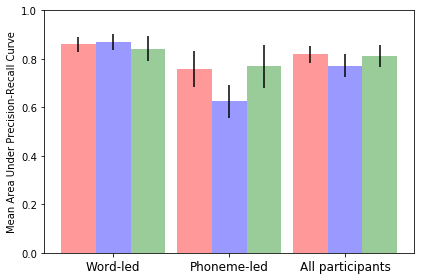

In [457]:
#speechace_auc
#even_speechace_auc
#odd_speechace_auc

print("SPEECHACE AUC TO GROUND TRUTH")
print(np.mean(all_speechace_auc))
print(stats.sem(all_speechace_auc))
print(np.mean(odd_speechace_auc))
print(stats.sem(odd_speechace_auc))
print(np.mean(even_speechace_auc))
print(stats.sem(even_speechace_auc))

print("EVEN BAG (PHONEME LED) PHONEME AND WORD AUC TO GROUND TRUTH")
print(np.mean(even_phoneme_auc))
print(stats.sem(even_phoneme_auc))
print(np.mean(even_word_auc))
print(stats.sem(even_word_auc))

print("ODD BAG (WORD LED) PHONEME AND WORD AUC TO GROUND TRUTH")
print(np.mean(odd_phoneme_auc))
print(stats.sem(odd_phoneme_auc))
print(np.mean(odd_word_auc))
print(stats.sem(odd_word_auc))

#print("EVEN BAG (PHONEME LED) PHONEME AND WORD AUC TO SPEECHACE")
#print(np.mean(even_speechace_phoneme_auc))
#print(np.mean(even_speechace_word_auc))
#print(even_speechace_phoneme_auc)
#print(even_speechace_word_auc)


#print("ODD BAG (WORD LED) PHONEME AND WORD AUC TO SPEECHACE")
#print(np.mean(odd_speechace_phoneme_auc))
#print(stats.sem(odd_speechace_phoneme_auc))
#print(np.mean(odd_speechace_word_auc))
#print(stats.sem(odd_speechace_word_auc))

print("ALL BAG WORD AND PHONEME AUC")
print(np.mean(all_word_auc))
print(stats.sem(all_word_auc))
print(np.mean(all_phoneme_auc))
print(stats.sem(all_phoneme_auc))


## Even-odd-all Experiment+SpeechAce to Ground Truth analysis

figsize = (20, 20)

fig, ax = plt.subplots()

n_groups = 3
index = np.arange(n_groups)
bar_width = 0.30
opacity = 0.4

from scipy import stats

rects1 = plt.bar(index + bar_width, [np.mean(odd_word_auc), np.mean(even_word_auc), np.mean(all_word_auc)], bar_width,
                alpha= opacity,
                color='r',
                label='Word-GPR',
                yerr=[stats.sem(odd_word_auc), stats.sem(even_word_auc), stats.sem(all_word_auc)])

rects1 = plt.bar(index + 2*bar_width, [np.mean(odd_phoneme_auc), np.mean(even_phoneme_auc), np.mean(all_phoneme_auc)], bar_width,
                alpha = opacity,
                color='b',
                label='Phoneme-GPR',
                yerr=[stats.sem(odd_phoneme_auc), stats.sem(even_phoneme_auc), stats.sem(all_phoneme_auc)])

rects1 = plt.bar(index + 3*bar_width, [np.mean(odd_speechace_auc), np.mean(even_speechace_auc), np.mean(all_speechace_auc)], bar_width,
                alpha = opacity,
                color='g',
                label='SpeechAce-Posttest',
                yerr=[stats.sem(odd_speechace_auc), stats.sem(even_speechace_auc), stats.sem(all_speechace_auc)])

plt.ylabel('Mean Area Under Precision-Recall Curve')
plt.ylim(0, 1.0)
plt.xticks(index + (2*bar_width), (['Word-led', 'Phoneme-led', 'All participants']), fontsize=12)

# from matplotlib.font_manager import FontProperties
# fontP = FontProperties()
# fontP.set_size('small')
# plt.legend([fig], "title", prop=fontP)
# plt.legend(fontsize=14)
plt.savefig("main_result.svg")
plt.tight_layout()
plt.show()


## Even-odd SpeechAce to Experiment analysis

# for i in range(0, len(even_speechace_word_auc)):
#     plt.scatter([1 * len([even_speechace_word_auc[i]])], [even_speechace_word_auc[i]], color='r',s=15)
#     plt.scatter([0 * len([even_speechace_phoneme_auc[i]])], [even_speechace_phoneme_auc[i]], color='r',s=15)
#     plt.plot(indices, [even_speechace_phoneme_auc[i], even_speechace_word_auc[i]],
#                 alpha= opacity,
#                 color='r',
#                 ms=10)

# for i in range(0, len(odd_speechace_word_auc)):    
#     plt.scatter([3 * len([odd_speechace_word_auc[i]])], [odd_speechace_word_auc[i]], color='b',s=15)
#     plt.scatter([2 * len([odd_speechace_phoneme_auc[i]])], [odd_speechace_phoneme_auc[i]], color='b',s=15)

#     plt.plot([x+2 for x in indices], [odd_speechace_phoneme_auc[i], odd_speechace_word_auc[i]],
#                 alpha= opacity,
#                 color='b',
#                 ms=10)
        
    
# plt.ylabel('Classification AUC on SpeechAce labels', fontsize=12)
# plt.xticks([0.5, 2.5], ["Phoneme-Guided AL", "Word-Guided AL"], fontsize=12)
# plt.tight_layout()
# plt.show()


In [257]:

# make some graphs!!!!
import matplotlib.pyplot as plt
from sklearn import metrics

GT_class_threshold = 3.0
SA_class_threshold = .66
GP_model_threshold = 0.4

######### ALL_BAG SPEECHACE TO EXP_SCORE ##############
speechace_f1 = []
even_speechace_f1 = []
odd_speechace_f1 = []


######### ALL_BAG SPEECHACE AUC TO GT ##############

for i in range(0, len(all_speechace_scores)):

    speechace_means = [np.mean(x) / 100.0 for x in all_speechace_scores[i]]
    bag_ground_truth = [(1 if x > GT_class_threshold else 0) for x in all_bag_gt[i]]
    
    #print(speechace_means)
    #print(bag_ground_truth)

    if (len(all_bag_gt)) > 1:
        f1 = metrics.f1_score(bag_ground_truth, [1 if x > SA_class_threshold else 0 for x in speechace_means], average='micro')
        
        pid = all_rectified_msgs[i][0]
        #print("speechace pid was" + str(pid))
        speechace_f1.append(f1)
        
        if (int(pid[1:]) % 2 == 1):
            #print("adding to odd auc")
            odd_speechace_f1.append(f1)
        else:
            even_speechace_f1.append(f1)
            
print("SPEECHACE F1 TO GROUND TRUTH")
print(np.mean(speechace_f1))
print(np.mean(odd_speechace_f1))
print(np.mean(even_speechace_f1))
#print(speechace_auc)

######### EVEN BAG AUC ##############

even_word_f1 = []
even_phoneme_f1 = []

for i in range(0, len(even_bag_word_scores)):

    bag_ground_truth = [(1 if x > GT_class_threshold else 0) for x in even_bag_gt[i]]
    #print(even_bag_gt[i])

    if (len(bag_ground_truth)) > 1:
        binarized_word_scores = [1 if x > GP_model_threshold else 0 for x in even_bag_word_scores[i]]
        binarized_phoneme_scores = [1 if x > GP_model_threshold else 0 for x in even_bag_phoneme_scores[i]]

        #print(binarized_word_scores)
        word_f1 = metrics.f1_score(bag_ground_truth, binarized_word_scores, average='micro')
        phoneme_f1 = metrics.f1_score(bag_ground_truth, binarized_phoneme_scores, average='micro')

        even_phoneme_f1.append(phoneme_f1)
        even_word_f1.append(word_f1)
            
print("EVEN BAG (PHONEME LED) PHONEME AND WORD F! TO GROUND TRUTH")
print(np.mean(even_phoneme_f1))
print(np.mean(even_word_f1))
#print(even_phoneme_auc)
#print(even_word_auc)

######### ODD BAG AUC ##############

odd_word_f1 = []
odd_phoneme_f1 = []

for i in range(0, len(odd_bag_word_scores)):

    bag_ground_truth = [(1 if x > GT_class_threshold else 0) for x in odd_bag_gt[i]]
    #print(odd_bag_gt[i])
    binarized_word_scores = [1 if x > GP_model_threshold else 0 for x in odd_bag_word_scores[i]]
    binarized_phoneme_scores = [1 if x > GP_model_threshold else 0 for x in odd_bag_phoneme_scores[i]]

    if (len(bag_ground_truth)) > 1:
        word_f1 = metrics.f1_score(bag_ground_truth, binarized_word_scores)
        phoneme_f1 = metrics.f1_score(bag_ground_truth, binarized_phoneme_scores)

        odd_phoneme_f1.append(phoneme_f1)
        odd_word_f1.append(word_f1)
            
print("ODD BAG (WORD LED) PHONEME AND WORD F1 TO GROUND TRUTH")
print(np.mean(odd_phoneme_f1))
print(np.mean(odd_word_f1))


############### EVEN / ODD AUC to SPEECHACE ################

odd_speechace_word_f1 = []
odd_speechace_phoneme_f1 = []

even_speechace_word_f1 = []
even_speechace_phoneme_f1 = []
    
    
for i in range(0, len(even_bag_speechace_scores)):
    speechace_means = [np.mean(x) / 100.0 for x in even_bag_speechace_scores[i]]
    speechace_labels = [(1 if x > SA_class_threshold else 0) for x in speechace_means]    
    #print(even_speechace_scores[i])
    #print('-----------')
    #print(speechace_labels)
    #print(bag_ground_truth)
    
    binarized_word_scores = [1 if x > GP_model_threshold else 0 for x in even_bag_word_scores[i]]
    binarized_phoneme_scores = [1 if x > GP_model_threshold else 0 for x in even_bag_phoneme_scores[i]]

    if (len(bag_ground_truth)) > 1:
        word_f1 = metrics.f1_score(speechace_labels, binarized_word_scores)
        phoneme_f1 = metrics.f1_score(speechace_labels, binarized_phoneme_scores)

        even_speechace_phoneme_f1.append(phoneme_f1)
        even_speechace_word_f1.append(word_f1)


print('ODD BAG SPEECHACE SCORES')
for i in range(0, len(odd_bag_speechace_scores)):

    speechace_means = [np.mean(x) / 100.0 for x in odd_bag_speechace_scores[i]]
    speechace_labels = [(1 if x > SA_class_threshold else 0) for x in speechace_means]   
    #print(odd_speechace_scores[i])
    #print('-----------')
    #print(speechace_labels)
    #print(bag_ground_truth)

    binarized_word_scores = [1 if x > GP_model_threshold else 0 for x in odd_bag_word_scores[i]]
    binarized_phoneme_scores = [1 if x > GP_model_threshold else 0 for x in odd_bag_phoneme_scores[i]]

    if (len(bag_ground_truth)) > 1:
        word_f1 = metrics.f1_score(speechace_labels, binarized_word_scores)
        phoneme_f1 = metrics.f1_score(speechace_labels, binarized_phoneme_scores)

        odd_speechace_phoneme_f1.append(phoneme_f1)
        odd_speechace_word_f1.append(word_f1)     

print("EVEN BAG (PHONEME LED) PHONEME AND WORD F1 TO SPEECHACE")
print(np.mean(even_speechace_phoneme_f1))
print(np.mean(even_speechace_word_f1))

print("ODD BAG (WORD LED) PHONEME AND WORD F1 TO SPEECHACE")
print(np.mean(odd_speechace_phoneme_f1))
print(np.mean(odd_speechace_word_f1))



SPEECHACE F1 TO GROUND TRUTH
0.618035489158
0.647273687109
0.580443520365
EVEN BAG (PHONEME LED) PHONEME AND WORD F! TO GROUND TRUTH
0.49205924963
0.592900798942
ODD BAG (WORD LED) PHONEME AND WORD F1 TO GROUND TRUTH
0.650168143065
0.646988559734
ODD BAG SPEECHACE SCORES
EVEN BAG (PHONEME LED) PHONEME AND WORD F1 TO SPEECHACE
0.332178198833
0.387699770678
ODD BAG (WORD LED) PHONEME AND WORD F1 TO SPEECHACE
0.505966631007
0.513064135381


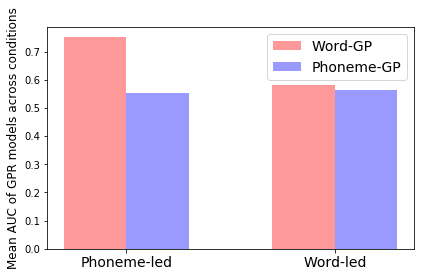

In [254]:
# make some graphs!!!!
import matplotlib.pyplot as plt

figsize = (12, 8)

fig, ax = plt.subplots()

n_groups = 2
index = np.arange(n_groups)
bar_width = 0.30
opacity = 0.4

rects1 = plt.bar(index + bar_width, [np.mean(even_speechace_word_auc), np.mean(odd_speechace_word_auc), np.mean(all_bag_word_auc)], bar_width,
                alpha= opacity,
                color='r',
                label='Word-GP')

rects1 = plt.bar(index + 2*bar_width, [np.mean(even_speechace_phoneme_auc), np.mean(odd_speechace_phoneme_auc)], bar_width,
                alpha = opacity,
                color='b',
                label='Phoneme-GP')

plt.ylabel('Mean AUC of GPR models across conditions', fontsize=12)
plt.xticks(index + (2*bar_width) - 0.15, (["Phoneme-led", "Word-led"]), fontsize=14)
plt.legend(fontsize=14)
plt.tight_layout()
plt.show()



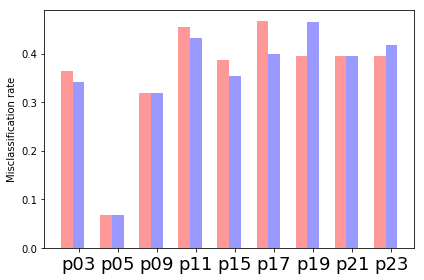

In [44]:
# GRAPH OF BY BAG ODD WORD LOSS

figsize = (12, 8)

fig, ax = plt.subplots()

n_groups = len(odd_bag_word_loss)
index = np.arange(n_groups)
bar_width = 0.30
opacity = 0.4

rects1 = plt.bar(index + bar_width, [np.mean(x) for x in odd_bag_word_loss], bar_width,
                alpha= opacity,
                color='r',
                label='Word Error')

rects1 = plt.bar(index + 2*bar_width, [np.mean(x) for x in odd_bag_phoneme_loss], bar_width,
                alpha = opacity,
                color='b',
                label='Phoneme Error')

plt.ylabel('Misclassification rate')
plt.xticks(index + (2*bar_width), ([x for x in PARTICIPANT_IDS if int(x[1:3]) % 2 == 1]), fontsize=18)
#plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

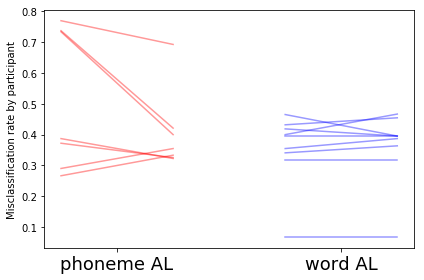

In [47]:
# GRAPH OF LOSS BY BAG AND MODEL
import matplotlib.pyplot as plt

figsize = (12, 8)

#fig, ax = plt.subplots()

n_groups = len(all_bag_word_loss)
bar_width = 0.30
opacity = 0.4

indices = [0,1]

for i in range(0, len(even_bag_word_loss)):    
    plt.plot(indices, [np.mean(even_bag_phoneme_loss[i]), np.mean(even_bag_word_loss[i])],
                alpha= opacity,
                color='r',
                label='Word Error')

for i in range(0, len(odd_bag_word_loss)):    
    plt.plot([x+2 for x in indices], [np.mean(odd_bag_phoneme_loss[i]), np.mean(odd_bag_word_loss[i])],
                alpha= opacity,
                color='b',
                label='Word Error')
        
    
plt.ylabel('Misclassification rate by participant')
plt.xticks([0.5, 2.5], ["phoneme AL", "word AL"], fontsize=18)
plt.tight_layout()
plt.show()



--------------
EVEN WORD, EVEN PHONEME, ODD WORD< ODD PHONEME CORRELATIONS
0.311937116977
0.142940745518
0.209120888887
0.220143060777
-------


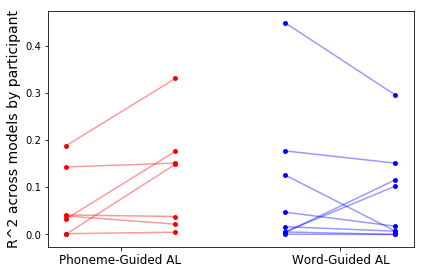

In [71]:
# GRAPH OF CORRELATIONS BY BAG AND MODEL
import matplotlib.pyplot as plt

figsize = (12, 8)

#fig, ax = plt.subplots()

bar_width = 0.30
opacity = 0.4

indices = [0,1]

## Even-odd SpeechAce to Experiment analysis

even_bag_word_corr = []
even_bag_phoneme_corr = []

odd_bag_word_corr = []
odd_bag_phoneme_corr = []

# Basic correlations
for i in range(0, len(even_bag_word_scores)):
    speechace_means = [np.mean(x) / 100.0 for x in even_bag_speechace_scores[i]]
    #print(even_bag_speechace_scores)
    
    if(not len(speechace_means) == len(even_bag_word_scores[i])):
        print("LENGTH DISCREPENCY: " + str(i))
 
    even_bag_word_corr.append(np.corrcoef(even_bag_word_scores[i], speechace_means)[0][1])
    even_bag_phoneme_corr.append(np.corrcoef(even_bag_phoneme_scores[i], speechace_means)[0][1])               
               
for i in range(0, len(odd_bag_word_scores)):
    speechace_means = [np.mean(x) / 100.0 for x in odd_bag_speechace_scores[i]]
    
    if(not len(speechace_means) == len(odd_bag_word_scores[i])):
        print("LENGTH DISCREPENCY: " + str(i))

    odd_bag_word_corr.append(np.corrcoef(odd_bag_word_scores[i], speechace_means)[0][1])
    odd_bag_phoneme_corr.append(np.corrcoef(odd_bag_phoneme_scores[i], speechace_means)[0][1])
    
print('--------------')
print('EVEN WORD, EVEN PHONEME, ODD WORD< ODD PHONEME CORRELATIONS')
print(np.mean(even_bag_word_corr))    
print(np.mean(even_bag_phoneme_corr))    
print(np.mean(odd_bag_word_corr))    
print(np.mean(odd_bag_phoneme_corr))  
print('-------')

even_bag_word_r2 = [x*x for x in even_bag_word_corr]
even_bag_phoneme_r2 = [x*x for x in even_bag_phoneme_corr]
odd_bag_word_r2 = [x*x for x in odd_bag_word_corr]
odd_bag_phoneme_r2 = [x*x for x in odd_bag_phoneme_corr]


for i in range(0, len(even_bag_word_corr)):
    plt.scatter([1 * len([even_bag_word_r2[i]])], [even_bag_word_r2[i]], color='r',s=15)
    plt.scatter([0 * len([even_bag_phoneme_r2[i]])], [even_bag_phoneme_r2[i]], color='r',s=15)
    plt.plot(indices, [even_bag_phoneme_r2[i], even_bag_word_r2[i]],
                alpha= opacity,
                color='r',
                ms=10)

for i in range(0, len(odd_bag_word_corr)):    
    plt.scatter([3 * len([odd_bag_word_r2[i]])], [odd_bag_word_r2[i]], color='b',s=15)
    plt.scatter([2 * len([odd_bag_phoneme_r2[i]])], [odd_bag_phoneme_r2[i]], color='b',s=15)

    plt.plot([x+2 for x in indices], [odd_bag_phoneme_r2[i], odd_bag_word_r2[i]],
                alpha= opacity,
                color='b',
                ms=10)
        
    
plt.ylabel('R^2 across models by participant', fontsize=14)
plt.xticks([0.5, 2.5], ["Phoneme-Guided AL", "Word-Guided AL"], fontsize=12)
plt.tight_layout()
plt.show()

[0.0048020164606313552, 0.14305396357717234, 0.38156285669451245, 0.19039956531086114, 0.22701348551551945, 0.39637809180652533, 0.079507664044562554, 0.33098508349259337, 0.27996660060035833, 0.033589831956562968, 0.079363871783470347, 0.010607094929688145, 0.003840580609592365, 0.022734184238655319, 0.016558954171689455, 0.17962028318397982]


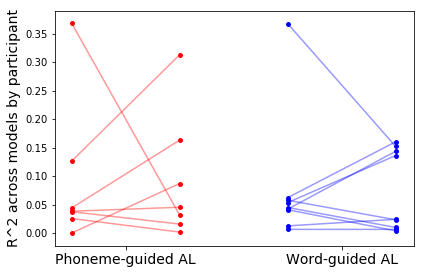

In [87]:
# GRAPH OF CORRELATIONS BY BAG AND MODEL
import matplotlib.pyplot as plt

figsize = (12, 8)

#fig, ax = plt.subplots()

bar_width = 0.30
opacity = 0.4

indices = [0,1]

even_bag_word_corr = []
odd_bag_word_corr = []

even_bag_phoneme_corr = []
odd_bag_phoneme_corr = []

speechace_gt_corr = []
for i in range(0, len(all_bag_gt)):
    speechace_means = [np.mean(x) / 100.0 for x in all_speechace_scores[i]]
#     print('MEANS, SCORES, CORR FOR ROUND ' + str(i))
#     print(speechace_means)
#     print('---------------')
#     print(all_bag_gt[i])
#     print('---------------')
#     print(np.corrcoef(all_bag_gt[i], speechace_means)[0][1])
#     print('---------------')
    speechace_gt_corr.append(np.corrcoef(all_bag_gt[i], speechace_means)[0][1])


for i in range(0, len(even_bag_word_scores)):
    even_bag_word_corr.append(np.corrcoef(even_bag_word_scores[i], even_bag_gt[i])[0][1])
    even_bag_phoneme_corr.append(np.corrcoef(even_bag_phoneme_scores[i], even_bag_gt[i])[0][1])               
               
for i in range(0, len(odd_bag_word_scores)):  
    odd_bag_word_corr.append(np.corrcoef(odd_bag_word_scores[i], odd_bag_gt[i])[0][1])
    odd_bag_phoneme_corr.append(np.corrcoef(odd_bag_phoneme_scores[i], odd_bag_gt[i])[0][1])
               
even_bag_word_r2 = [x*x for x in even_bag_word_corr]
even_bag_phoneme_r2 = [x*x for x in even_bag_phoneme_corr]
odd_bag_word_r2 = [x*x for x in odd_bag_word_corr]
odd_bag_phoneme_r2 = [x*x for x in odd_bag_phoneme_corr]

speechace_gt_r2 = [x*x for x in speechace_gt_corr]

print(speechace_gt_r2)
#print(odd_bag_word_r2)

for i in range(0, len(even_bag_word_corr)):
    plt.scatter([1 * len([even_bag_word_r2[i]])], [even_bag_word_r2[i]], color='r',s=15)
    plt.scatter([0 * len([even_bag_phoneme_r2[i]])], [even_bag_phoneme_r2[i]], color='r',s=15)
    plt.plot(indices, [even_bag_phoneme_r2[i], even_bag_word_r2[i]],
                alpha= opacity,
                color='r',
                label='Word Error')

for i in range(0, len(odd_bag_word_corr)):    
    plt.scatter([3 * len([odd_bag_word_r2[i]])], [odd_bag_word_r2[i]], color='b',s=15)
    plt.scatter([2 * len([odd_bag_phoneme_r2[i]])], [odd_bag_phoneme_r2[i]], color='b',s=15)
    plt.plot([x+2 for x in indices], [odd_bag_phoneme_r2[i], odd_bag_word_r2[i]],
                alpha= opacity,
                color='b',
                label='Word Error')
        
    
plt.ylabel('R^2 across models by participant', fontsize=14)
plt.xticks([0.5, 2.5], ["Phoneme-guided AL", "Word-guided AL"], fontsize=14)
plt.tight_layout()
plt.show()